# CASE STUDY :COMPARING CLUSTERING PCA VS non-PCA applied

Principal Component Analysis (PCA)
----

- is an algebraic technique for converting a set of observations of possibly correlated variables into the set of values of liner uncorrelated variables.


- PCA can be used for finding interrelations between various variables in the data.
- PCA can be used for interpreting and visualizing the data sets.
- PCA can also be used for visualizing genetic distance and connection between populations.
- PCA also makes analysis simple with the decrease in the number of variables

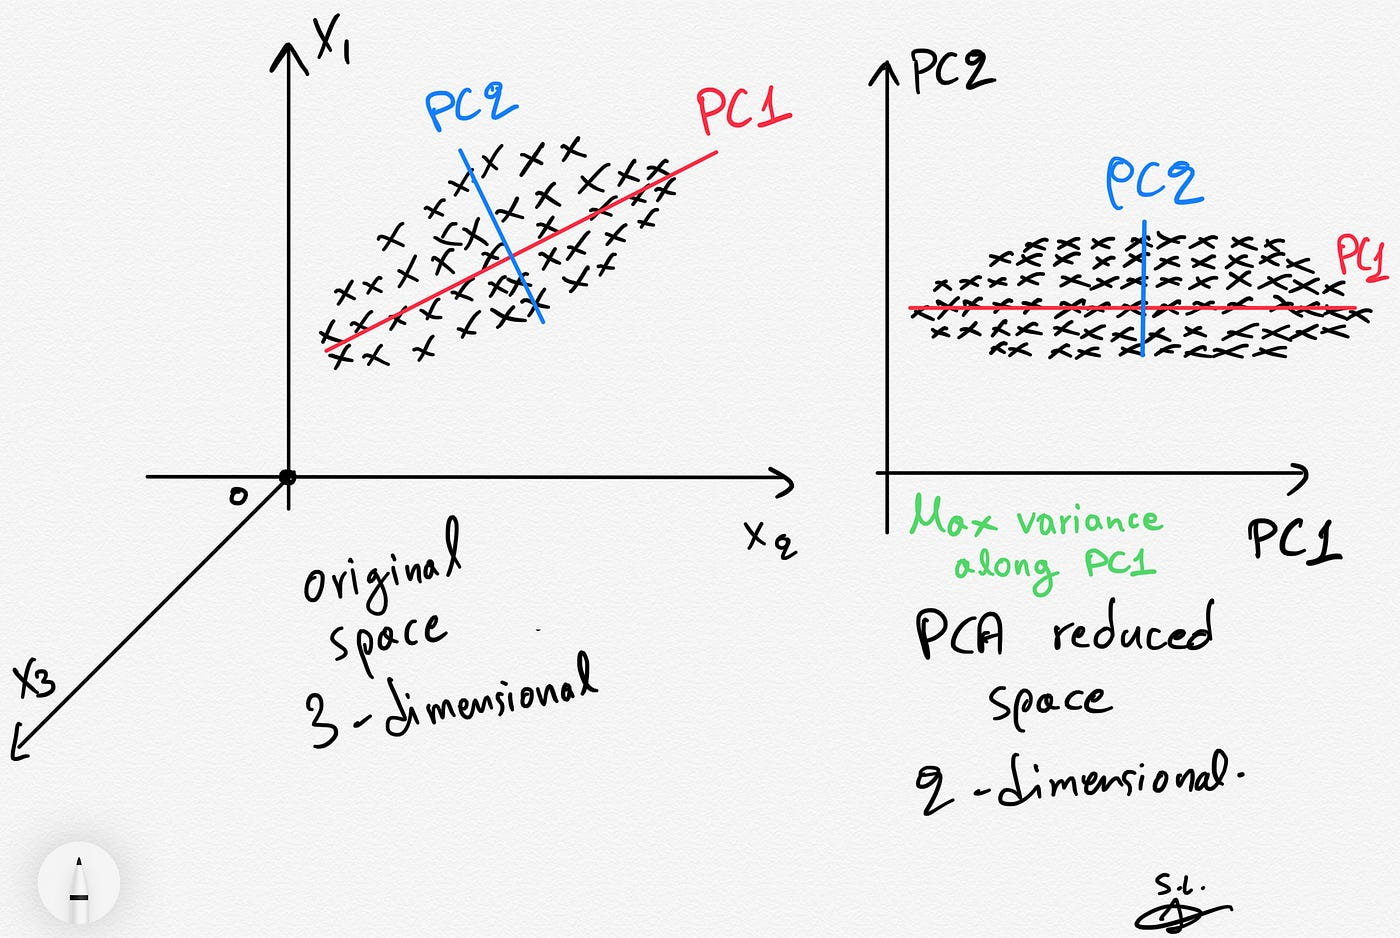

PROCEDURE-
----
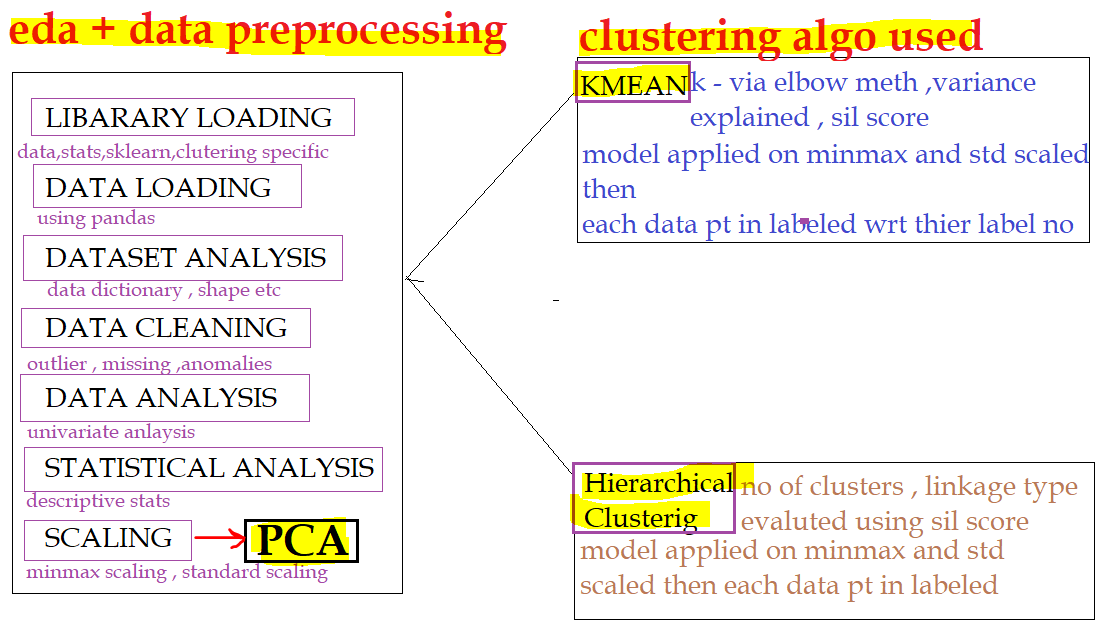

In [211]:
# Import Libraries

#SET 1 : DATA MANIPULATION AND ANALYSIS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#SET2 : DATA PREPROCESSING
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#SET 3 : PCA
from sklearn.decomposition import PCA

#SET 4 : ML CLUSTERING SPECIFIC
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch

#SET 5 : CLUSTERING EVALUATION SPECIFIC
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [212]:
#SET 6 : MISC
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

#SET 7:  Data display customization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [213]:
'''#SET 8 : GOOGLE COLLAB SPECIFIC
from google.colab import files
file=files.upload()'''

Saving wine.csv to wine (2).csv


## 1. Case Summary
### Perform Principal component analysis and perform clustering using first 3 principal component scores (both Heirarchical and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)

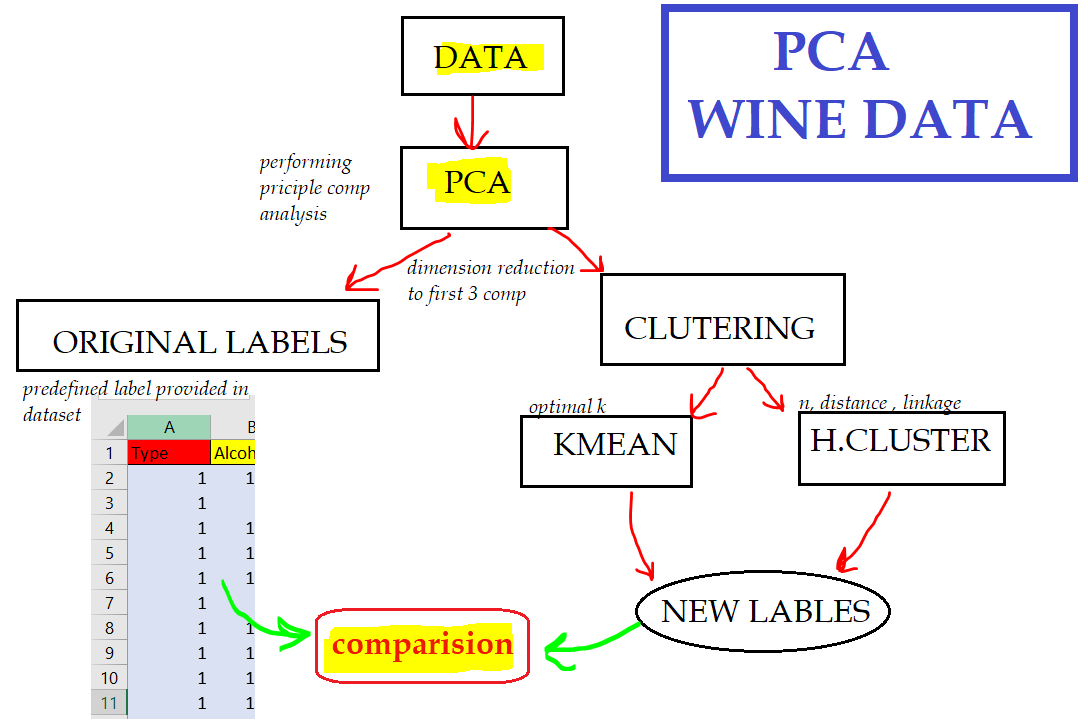

In [214]:
# Importing dataset
data = pd.read_csv('wine.csv')
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  1     14.23    1.71   2.43  15.6        127        2.80     3.06         
1  1     13.20    1.78   2.14  11.2        100        2.65     2.76         
2  1     13.16    2.36   2.67  18.6        101        2.80     3.24         
3  1     14.37    1.95   2.50  16.8        113        3.85     3.49         
4  1     13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0  0.28           2.29             5.64   1.04  3.92      1065     
1  0.26           1.28             4.38   1.05  3.40      1050     
2  0.30           2.81             5.68   1.03  3.17      1185     
3  0.24           2.18             7.80   0.86  3.45      1480     
4  0.39           1.82             4.32   1.04  2.93      735

Data Dictionary
--------

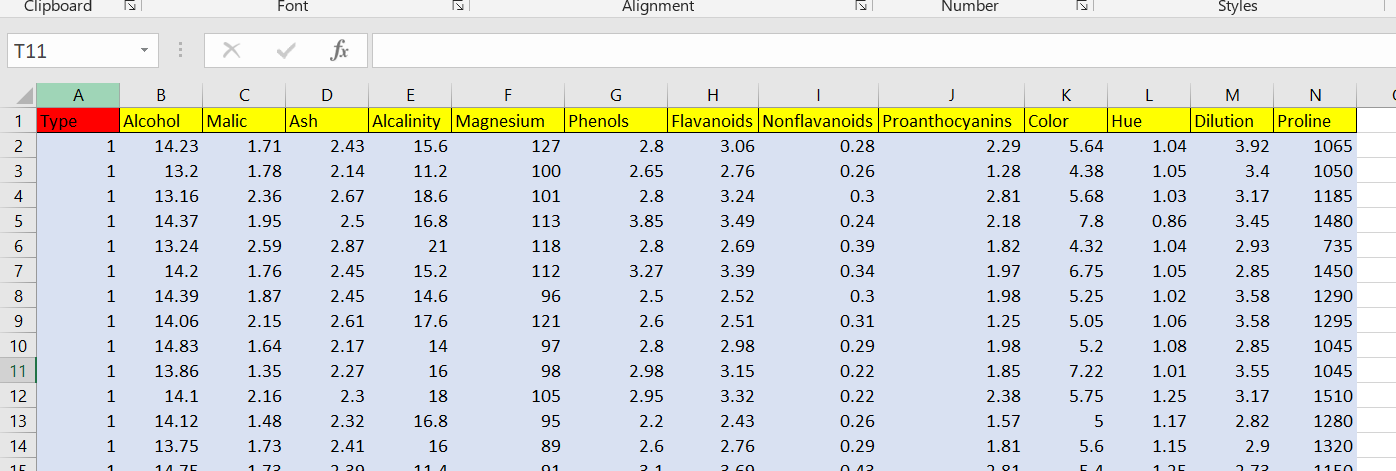

PreProcessing : (class column we have ignored at the begining who shows it has 3 clusters) to be dropped

In [215]:
data['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [216]:
data.Type.unique()

array([1, 2, 3])

In [217]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

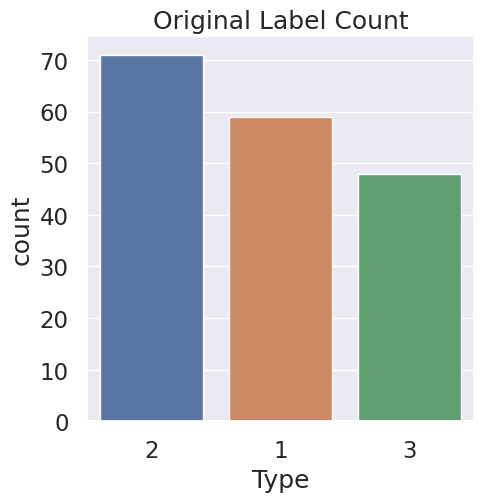

In [218]:
#visualizing count of original label
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Type', data=data,order=data.Type.value_counts().index)
plt.title('Original Label Count')
plt.show()

 Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [219]:
data['ID'] = range(1, 179, 1)
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  1     14.23    1.71   2.43  15.6        127        2.80     3.06         
1  1     13.20    1.78   2.14  11.2        100        2.65     2.76         
2  1     13.16    2.36   2.67  18.6        101        2.80     3.24         
3  1     14.37    1.95   2.50  16.8        113        3.85     3.49         
4  1     13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  
0  0.28           2.29             5.64   1.04  3.92      1065     1   
1  0.26           1.28             4.38   1.05  3.40      1050     2   
2  0.30           2.81             5.68   1.03  3.17      1185     3   
3  0.24           2.18             7.80   0.86  3.45      1480     4   
4  0.39           1.82             4.32   1.04  2.93      735      5

In [220]:
df = data.drop('Type',axis=1)

In [221]:
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  14.23    1.71   2.43  15.6        127        2.80     3.06         
1  13.20    1.78   2.14  11.2        100        2.65     2.76         
2  13.16    2.36   2.67  18.6        101        2.80     3.24         
3  14.37    1.95   2.50  16.8        113        3.85     3.49         
4  13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  
0  0.28           2.29             5.64   1.04  3.92      1065     1   
1  0.26           1.28             4.38   1.05  3.40      1050     2   
2  0.30           2.81             5.68   1.03  3.17      1185     3   
3  0.24           2.18             7.80   0.86  3.45      1480     4   
4  0.39           1.82             4.32   1.04  2.93      735      5

DataSet analysis
----

- data size
- data type
- data shape

In [222]:
df.shape

(178, 14)

conclusion

- no of observations = 178
- no of features = 14

hence too many features , PCA requires

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


DATA CLEANING
----

- missing/null values
- duplicates


In [224]:
#check the data for any missing/ na values

null_count_col = df.isnull().sum().value_counts(ascending=False)

print("Null Count for Columns:", null_count_col)


Null Count for Columns: 0    14
dtype: int64


In [225]:
# null count for rows

null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)
print("Null Count for Rows: ", null_count_row)


Null Count for Rows:  0    178
dtype: int64


In [226]:
# heck the data for any duplicate values
df.duplicated().sum()

0

In [227]:
df[df.duplicated()]

Empty DataFrame
Columns: [Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline, ID]
Index: []

coclusion : There are no missing / Null and Duplicated  values  either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

EDA
----

- data analysis
- statistic analysis

STATISTICAL ANALYSIS
----
- mean
- mode
- median
- range
- variance
- standard deviation

In [228]:
df.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean   13.000618   2.336348    2.366517    19.494944   99.741573   2.295112     
std    0.811827    1.117146    0.274344    3.339564    14.282484   0.625851     
min    11.030000   0.740000    1.360000    10.600000   70.000000   0.980000     
25%    12.362500   1.602500    2.210000    17.200000   88.000000   1.742500     
50%    13.050000   1.865000    2.360000    19.500000   98.000000   2.355000     
75%    13.677500   3.082500    2.557500    21.500000   107.000000  2.800000     
max    14.830000   5.800000    3.230000    30.000000   162.000000  3.880000     

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean   2.029270    0.361854       1.590899         5.058090    0.957449     
std    0.998859    0.124453       0.572359         2.318286    0.228572     
min    0.340000    0.130000       0.410000         1.280000    0.480000     
25%    1.205000    0.270000       1.250000         3.220000    0.782500     
50%    2.135000    0.340000       1.555000         4.690000    0.965000     
75%    2.875000    0.437500       1.950000         6.200000    1.120000     
max    5.080000    0.660000       3.580000         13.000000   1.710000     

         Dilution      Proline          ID  
count  178.000000  178.000000   178.000000  
mean   2.611685    746.893258   89.500000   
std    0.709990    314.907474   51.528309   
min    1.270000    278.000000   1.000000    
25%    1.937500    500.500000   45.250000   
50%    2.780000    673.500000   89.500000   
75%    3.170000    985.000000   133.750000  
max    4.000000    1680.000000  178.000000

UNIVARIATE ANALYSIS (DATA DISTRIBUTION)
--

In [229]:
# Checking the skewness of our dataset
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

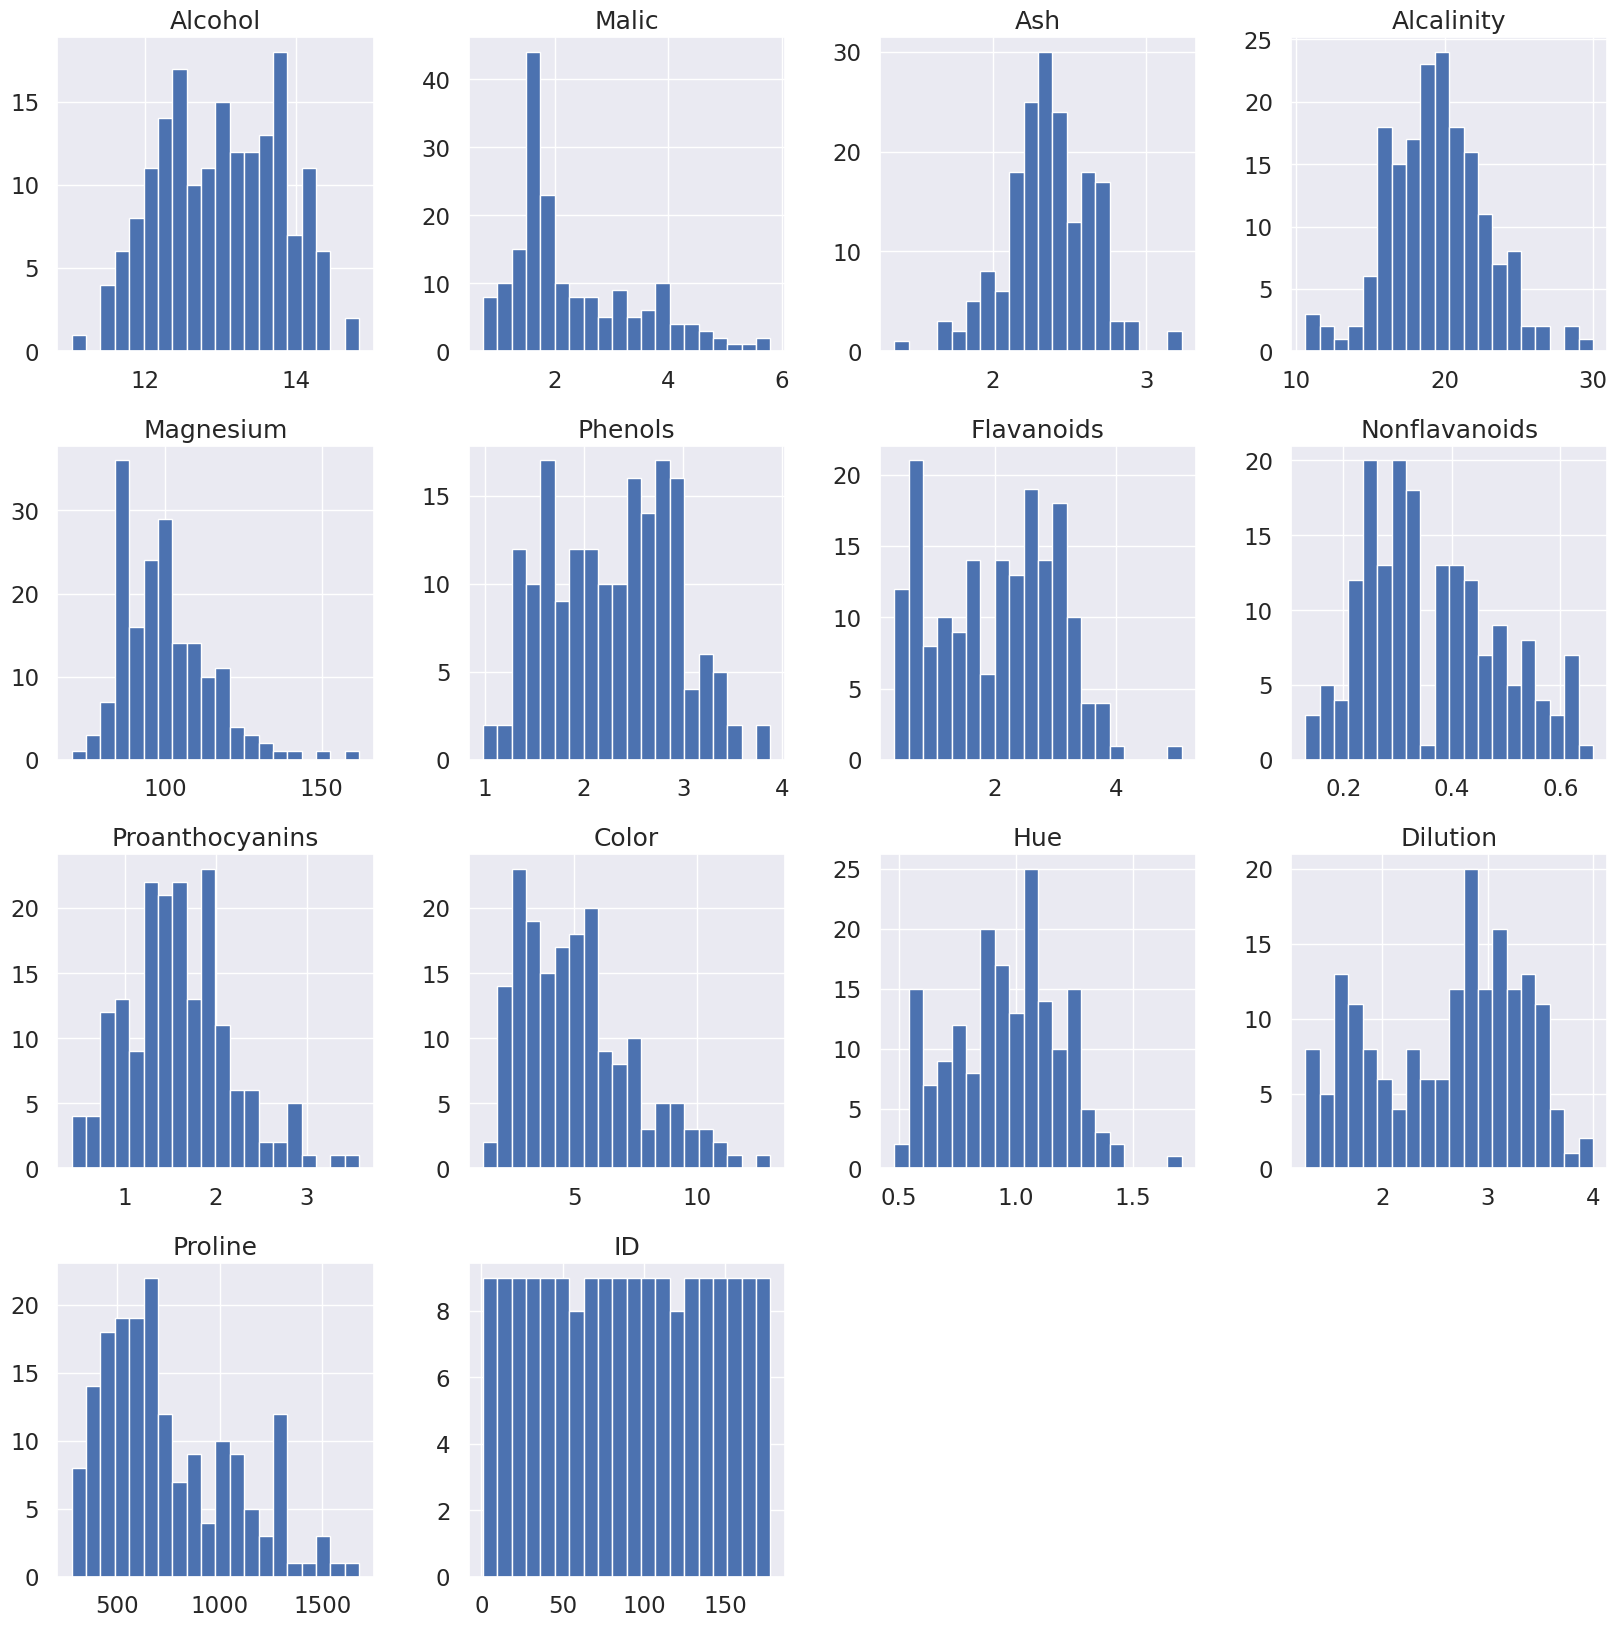

In [230]:
# Plotting the histogram of each numerical variable
# insights on distribution type , frequency range
sns.set(font_scale=1.5, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20 )

CONCLUSION:
 - since most of feature are not normal distribusted , hence we cant use GAUSSIAN MIX MODEL FOR CLUSTERING

 Outliers Analysis

 - box plot

In [231]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

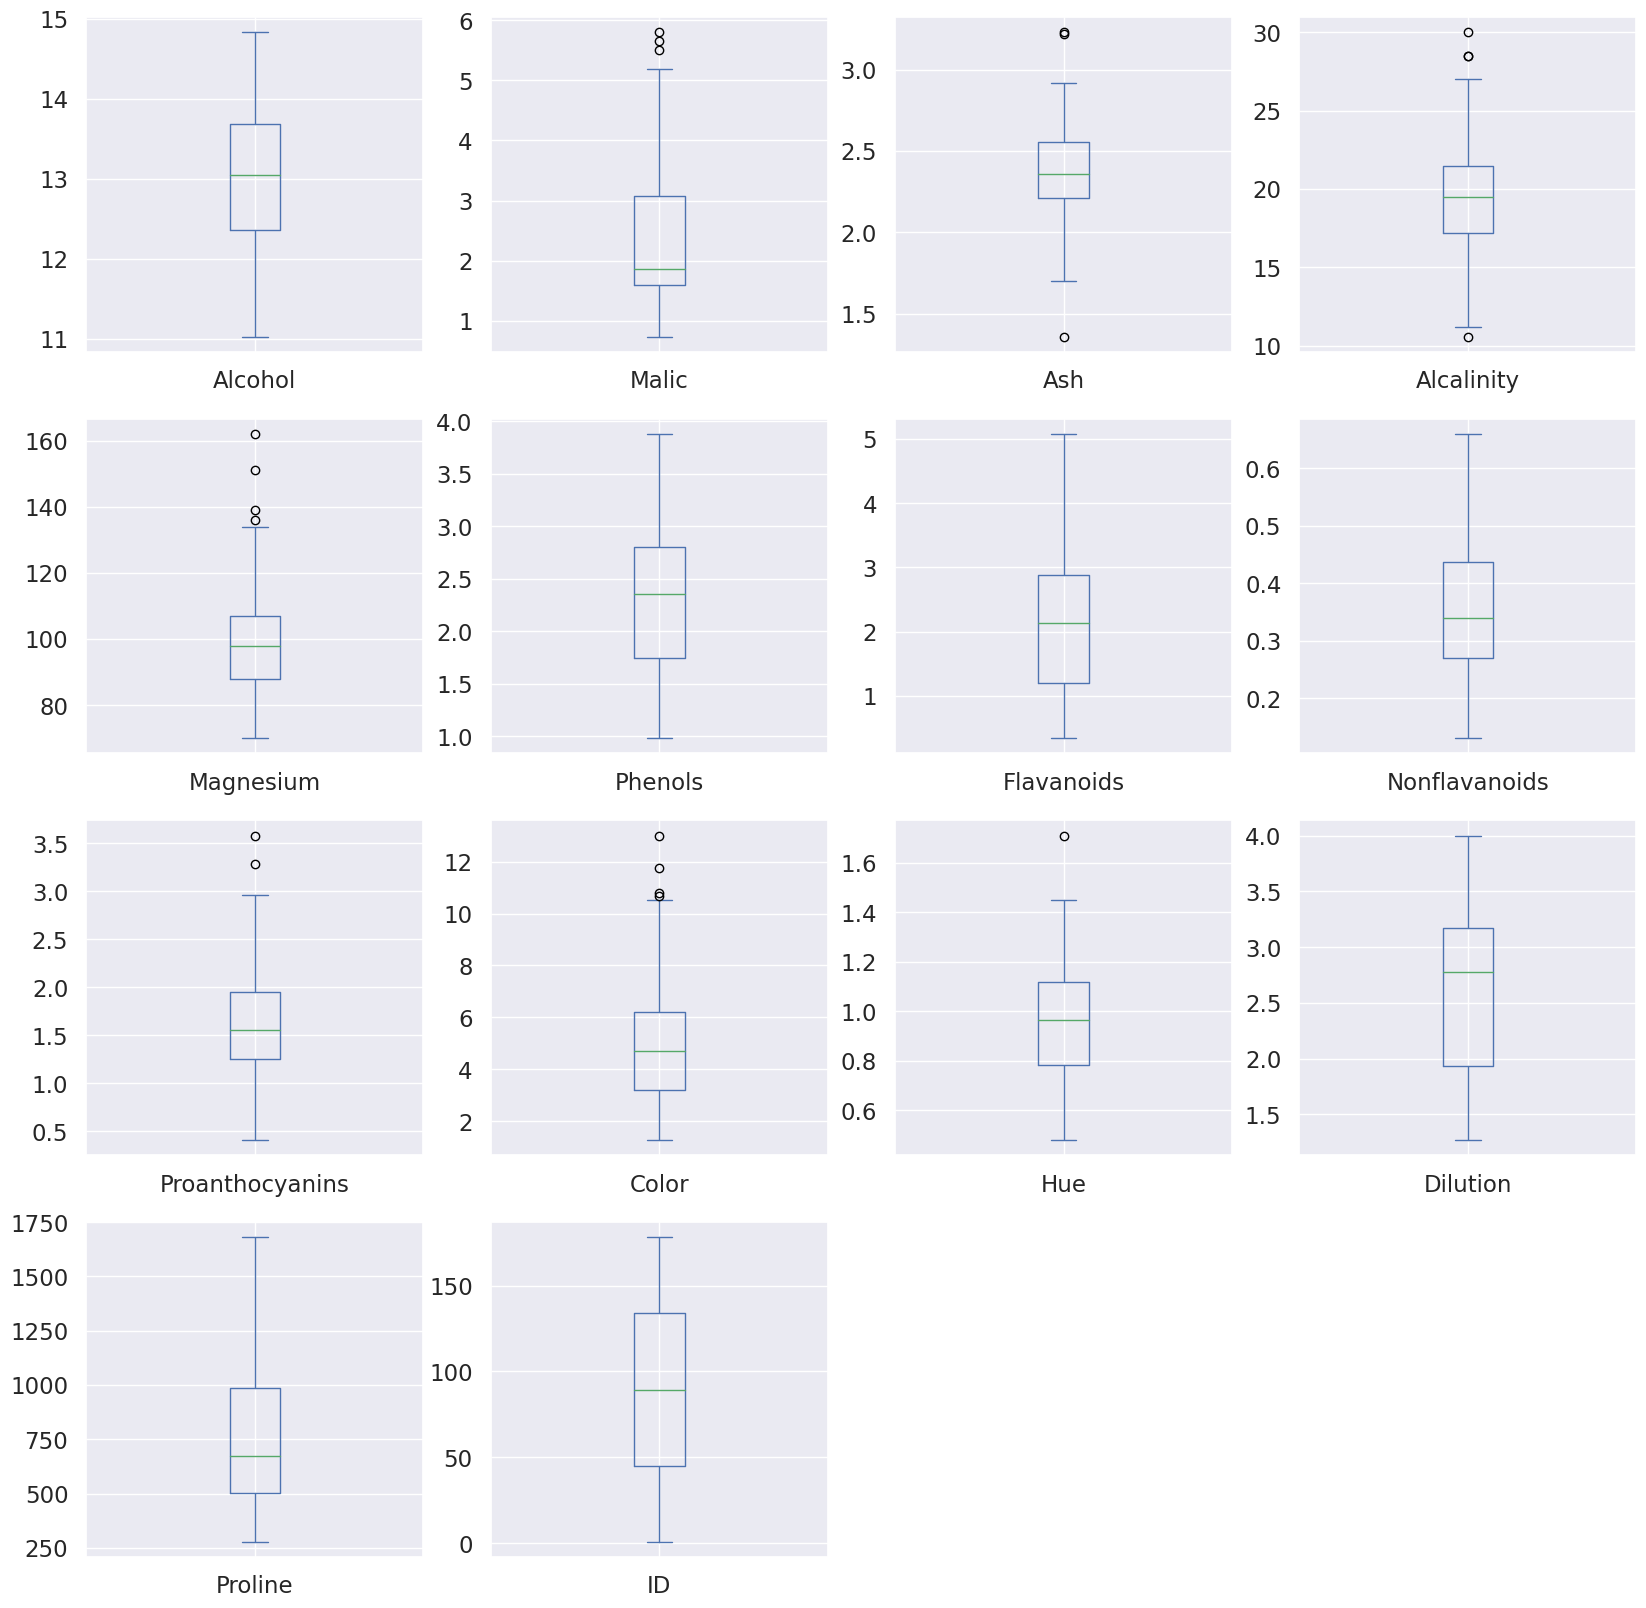

In [232]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False)
plt.show()

CORRELATION ANLAYSIS
---

- pairplot
- heatmap

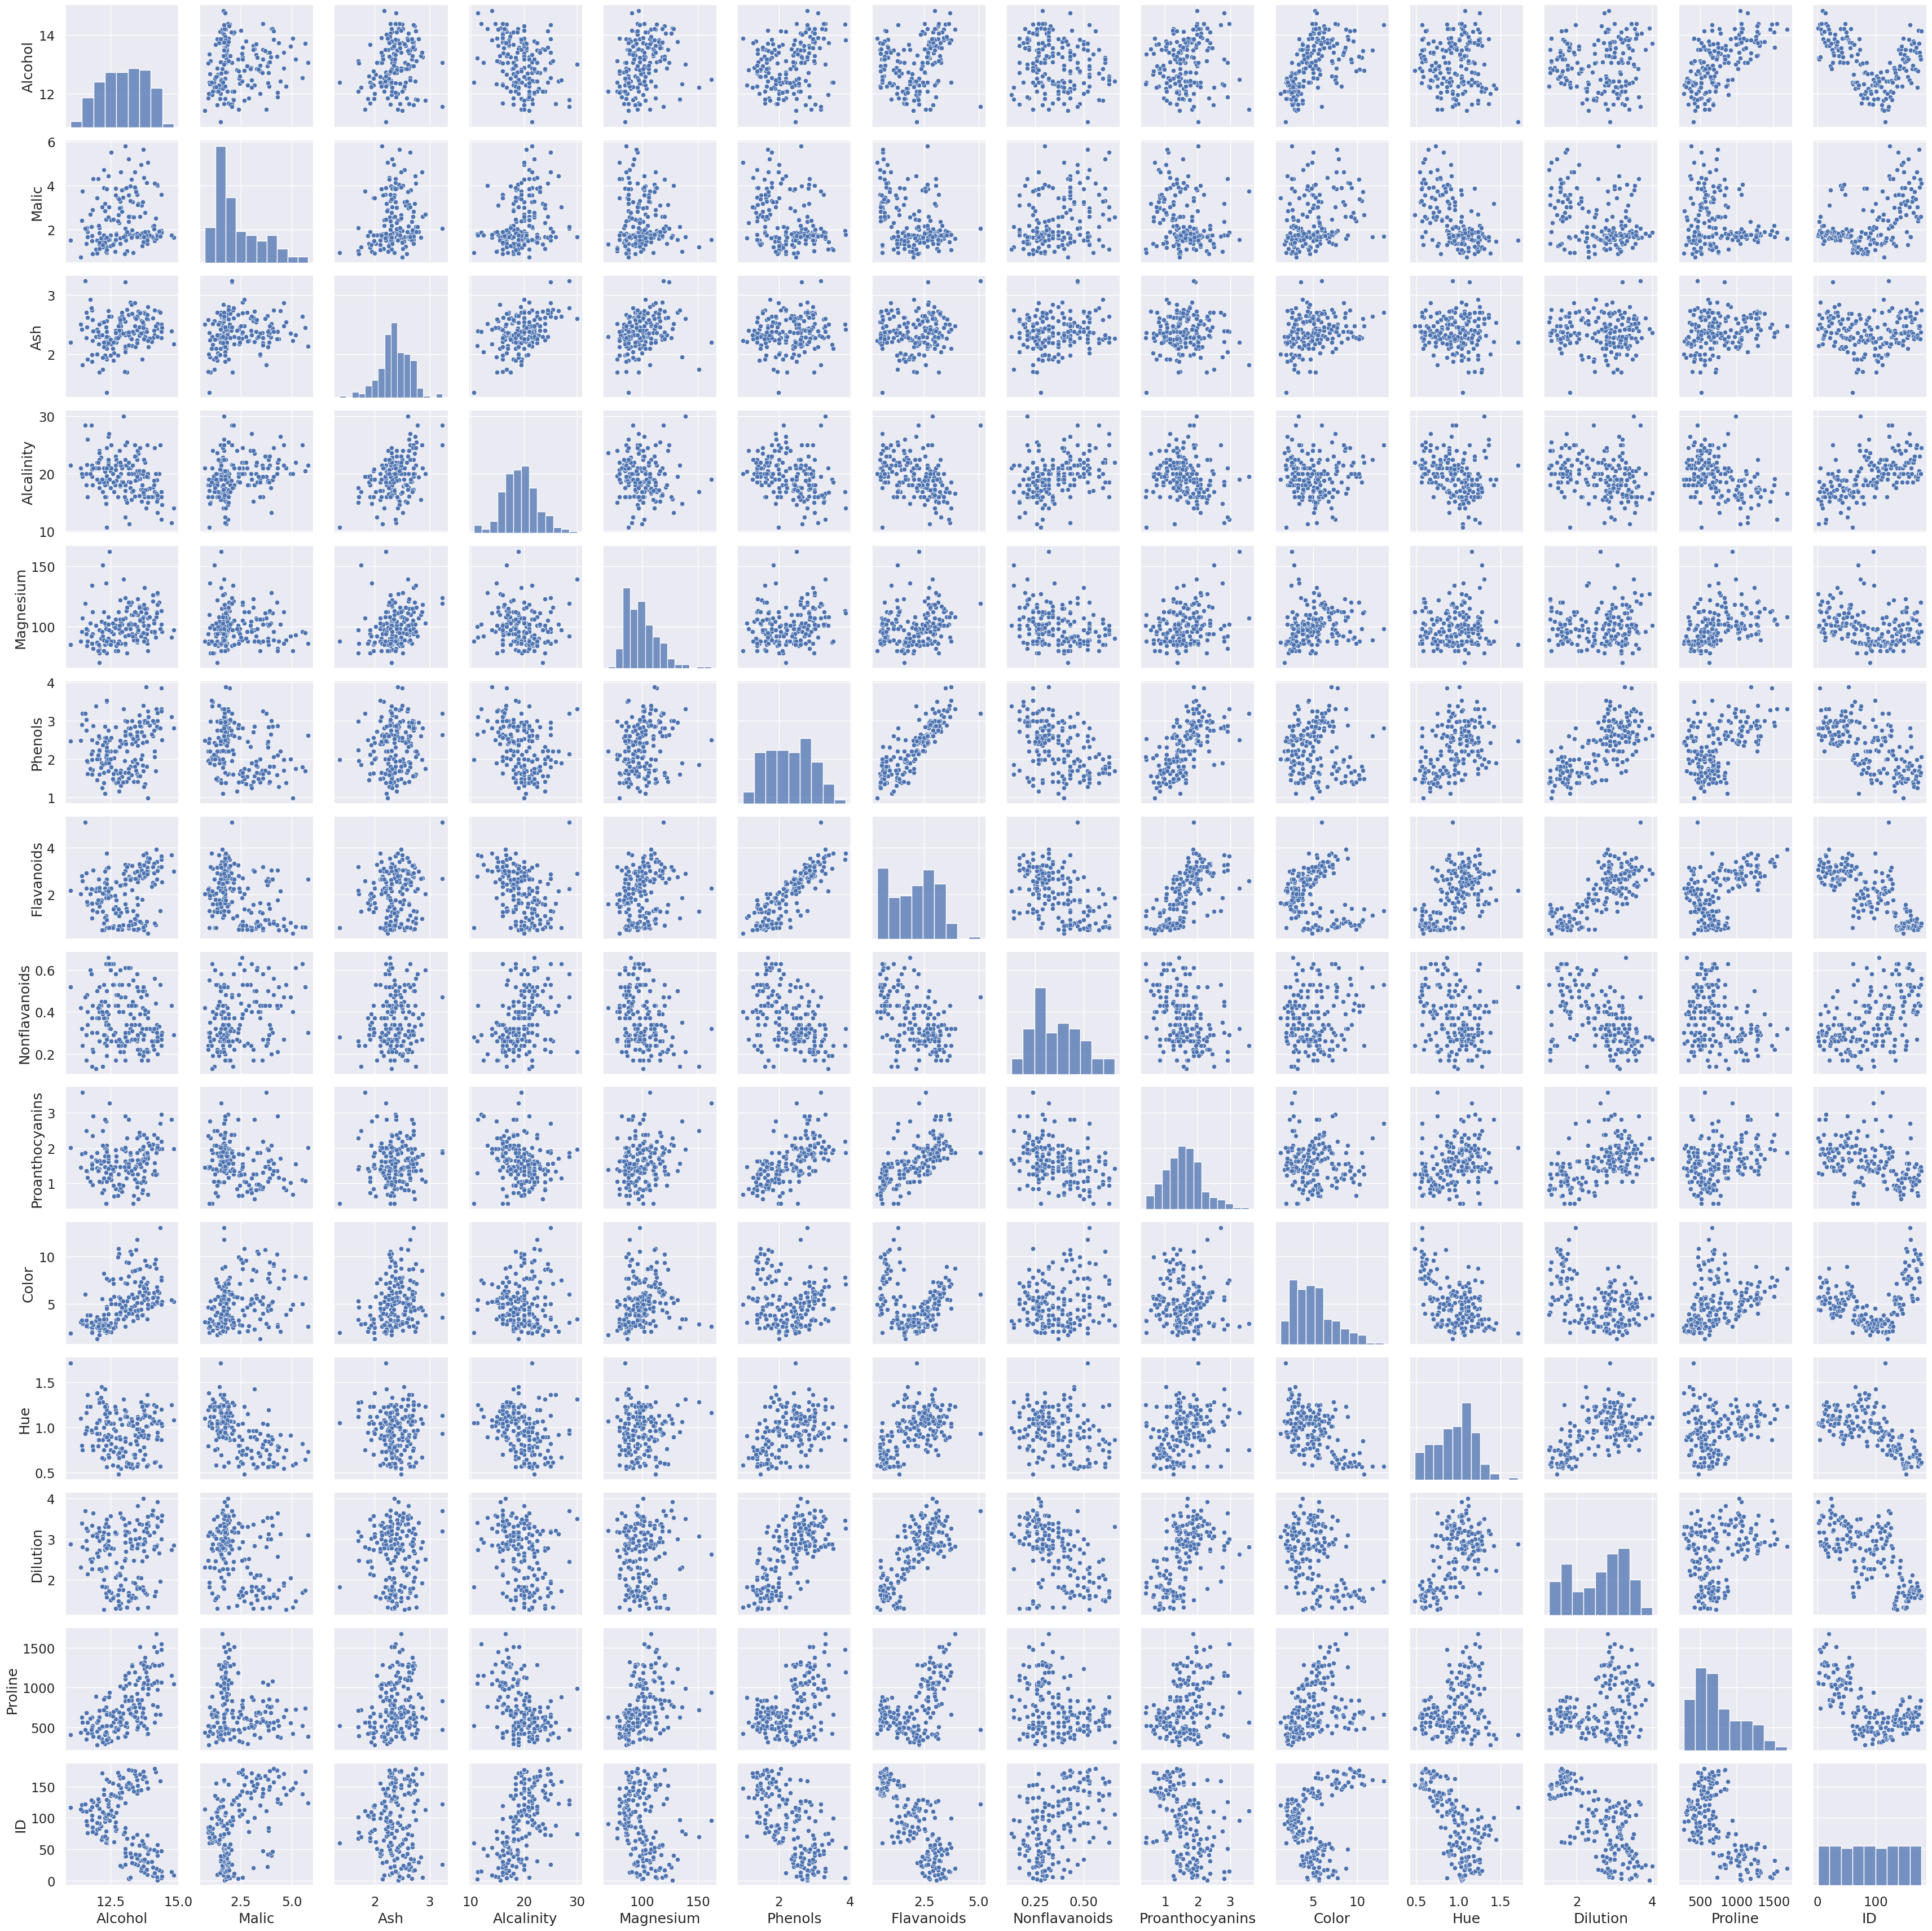

In [233]:
sns.pairplot(df,palette="dark")

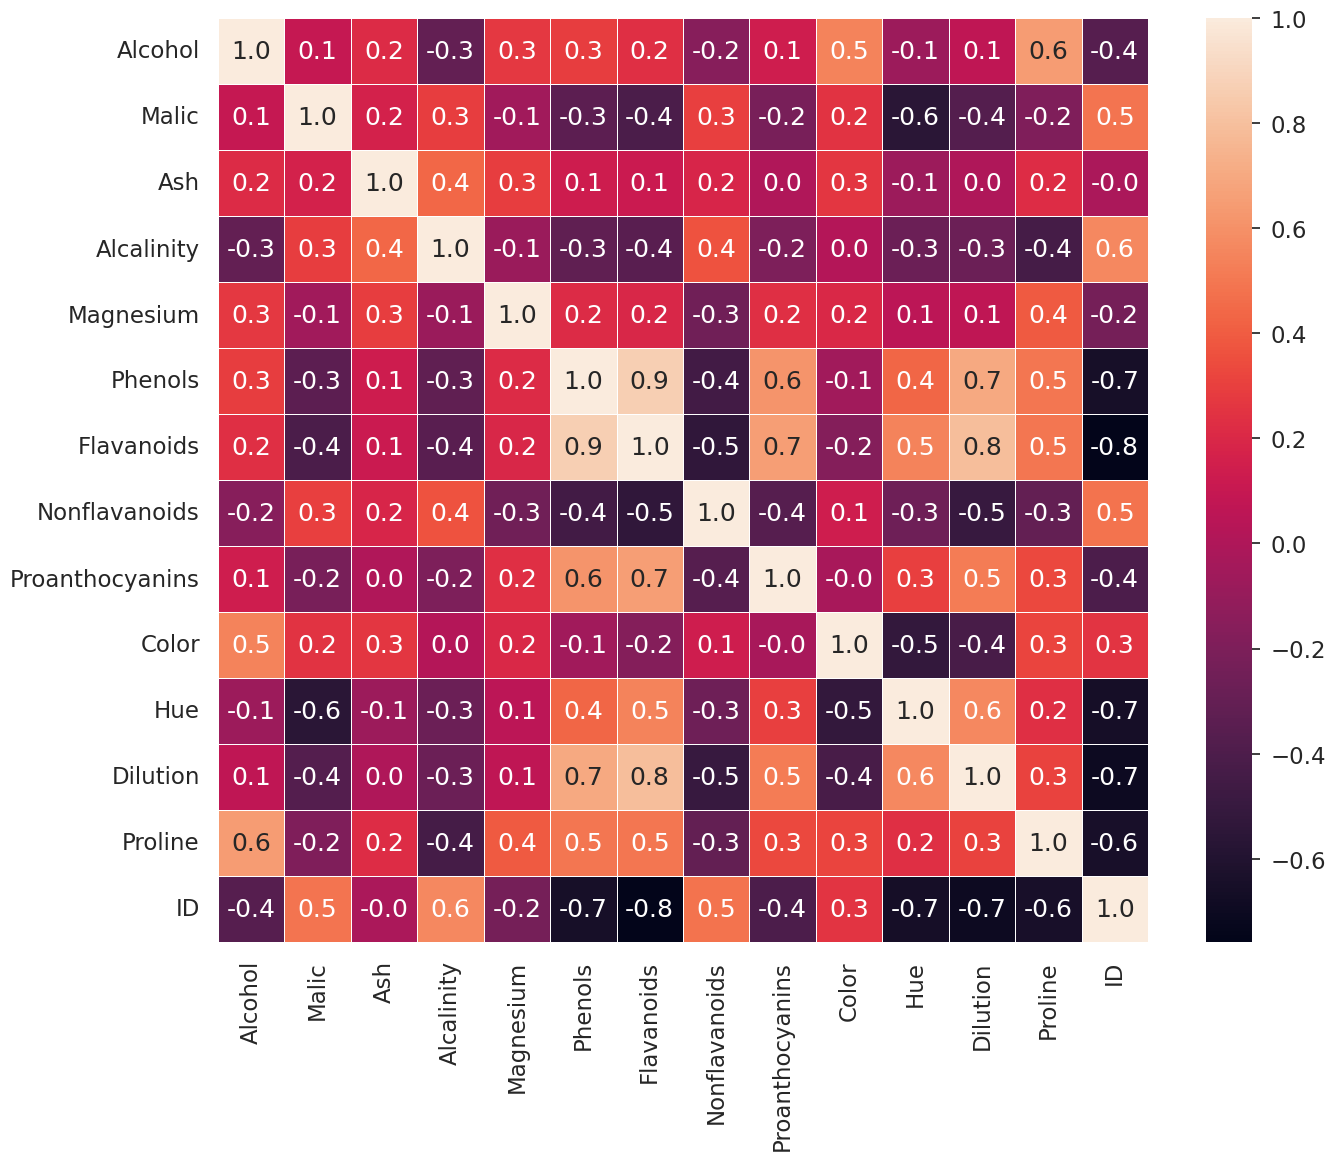

In [234]:
# correlation heatmap
f,ax = plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Conclusion:

- Flavanoids, Dilution and Proanthocyanins have positive correlation
- Proanthocyanins and Dilution have positive correlatio
- Dilution is positively correlated with Hue
- Alcohol is positively correlated with Proline

DATA PREPROCESSING
----

- Scaling dataset

  - min max
  - standard scaler

In [235]:
#Standard Scaling
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 14)

In [236]:
# Minmaxscaler
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 14)

PCA
---

steps involve

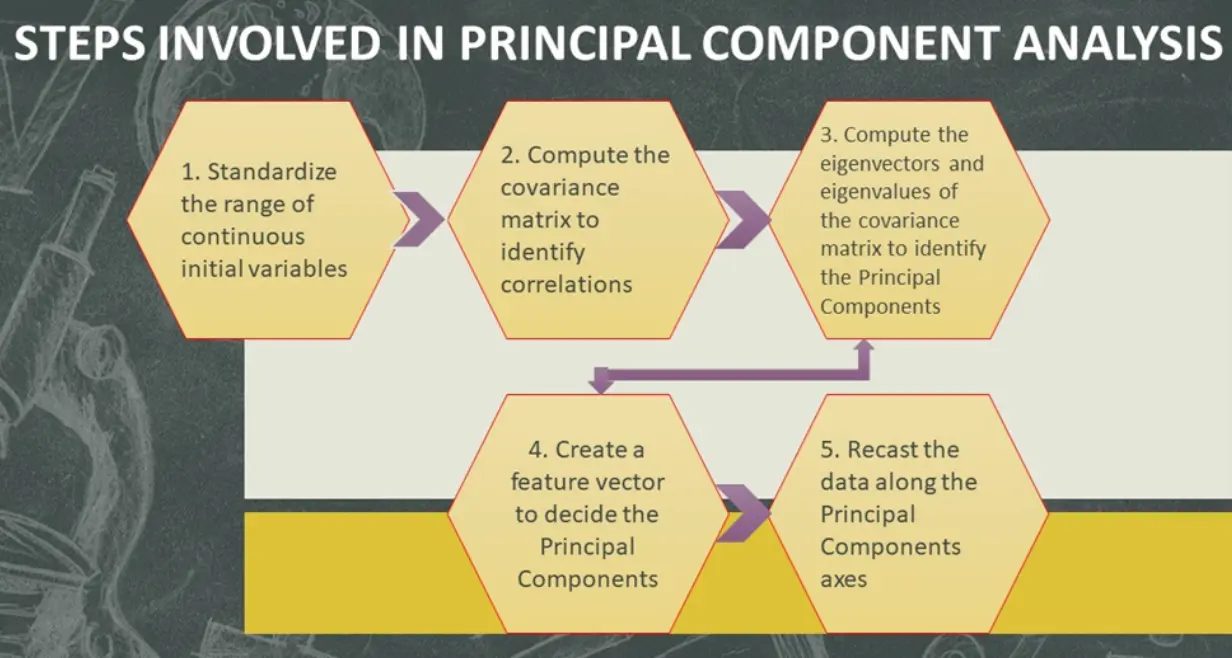

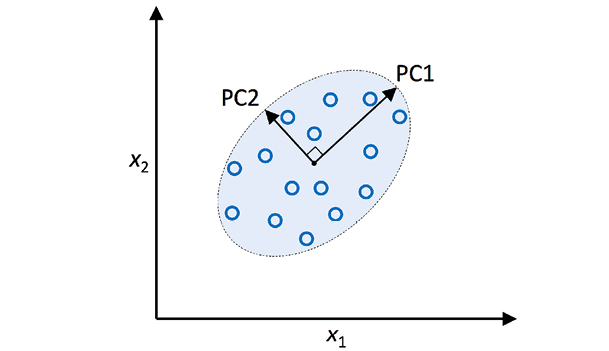

Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method

- maximum variance can be  explained by initial principle componenet

if we plot %age explained variation of each PC , also known as Scree Plot

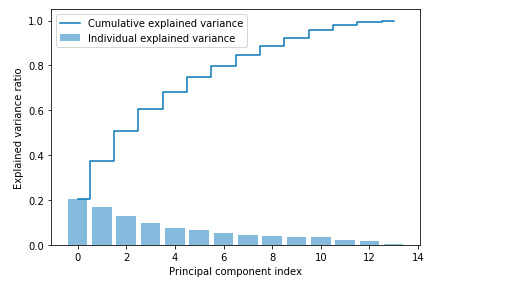

PCA on Standard scaled Data

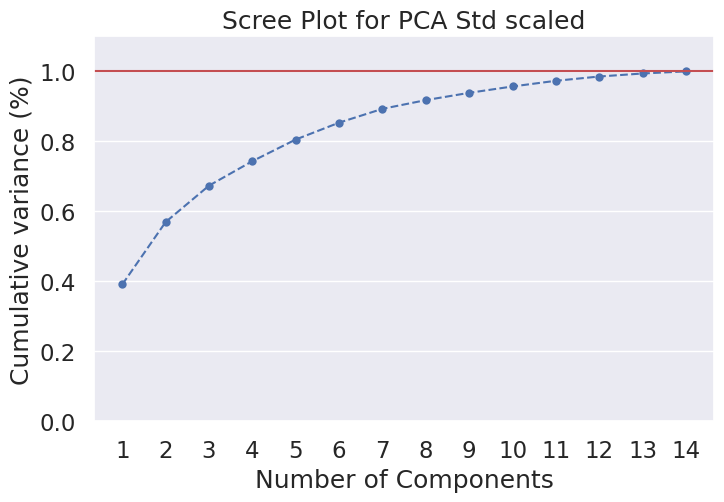

In [237]:
# PCA
pca_var = PCA()
pca_var.fit(std_df)

# Plot
plt.figure(figsize=(8,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Labeling
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot for PCA Std scaled')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [238]:
# the amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

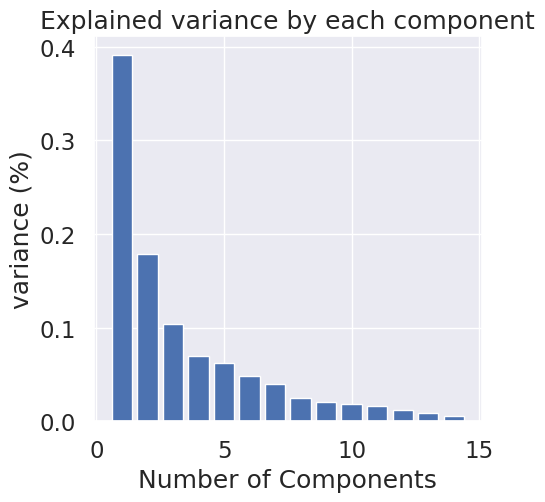

In [239]:
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [240]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [241]:
# PCA using first 3 component
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.723816 -1.447476 -0.153274
1  2.734987  0.334166 -2.079717
2  2.944840 -1.033583  0.979570
3  4.094144 -2.762344 -0.123541
4  1.550429 -0.867267  1.915570

PCA plot in 2D

Text(0, 0.5, 'PC2')

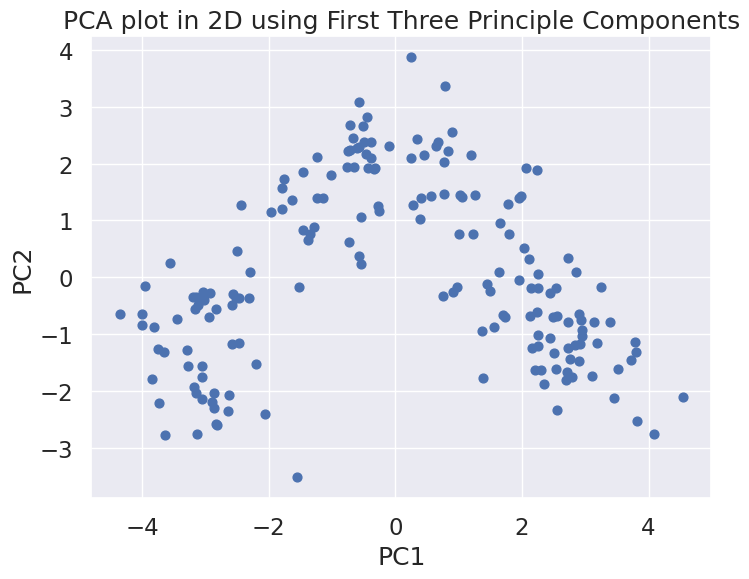

In [242]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using First Three Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

PCA on MinMax Scaled Datase

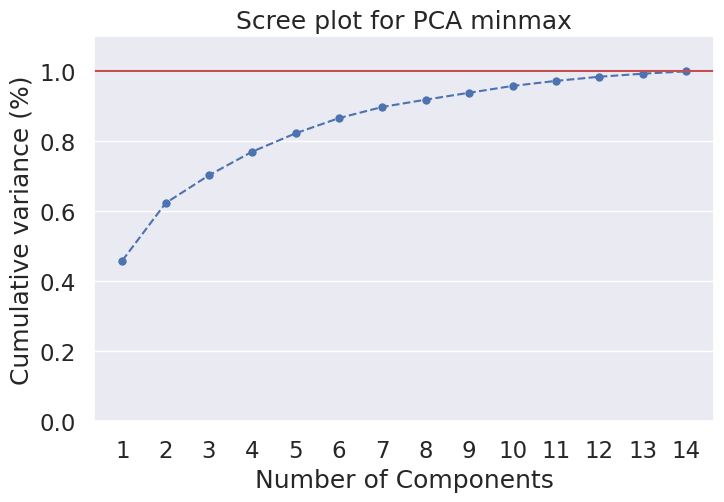

In [243]:
# PCA
pca_var = PCA()
pca_var.fit(minmax_df)

# Plot
plt.figure(figsize=(8,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Scree plot for PCA minmax')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [244]:
# the amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

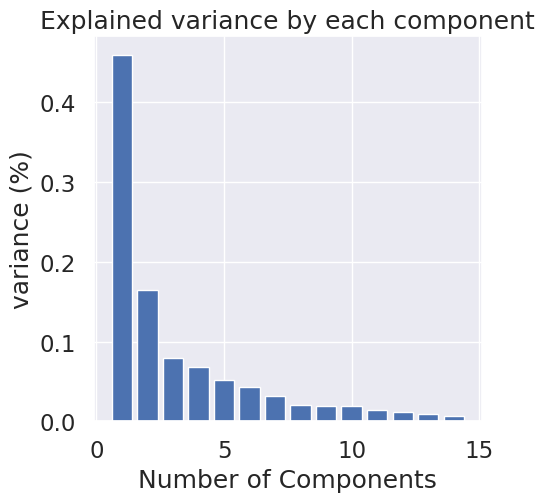

In [245]:
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [246]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [247]:
# PCA
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0  0.864955 -0.246505  0.012715
1  0.676158 -0.011751 -0.306279
2  0.692172 -0.186686  0.139093
3  0.955057 -0.568299  0.123337
4  0.411640 -0.067685  0.118278

#### PCA plot in 2D

Text(0, 0.5, 'PC2')

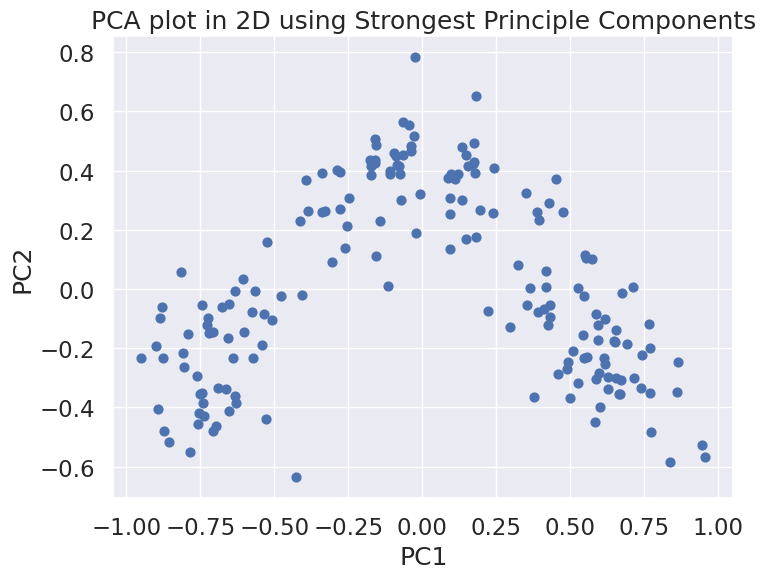

In [248]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

##### Notes:

+ Notice how these points have <b>no colours</b> (yet) because we don't know what their classes are. This is what makes it an <b>unsupervised method.</b>
+ We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by <b>clustering</b> the data into 3 groups using techniques such as <b>k-Means</b> and <b>Hierarchical</b>.

Clustering
----
Cluster analysis refers to the grouping of observations so that the objects within eachcluster share similar properties, and properties of all clusters are independent of each
other.

type:

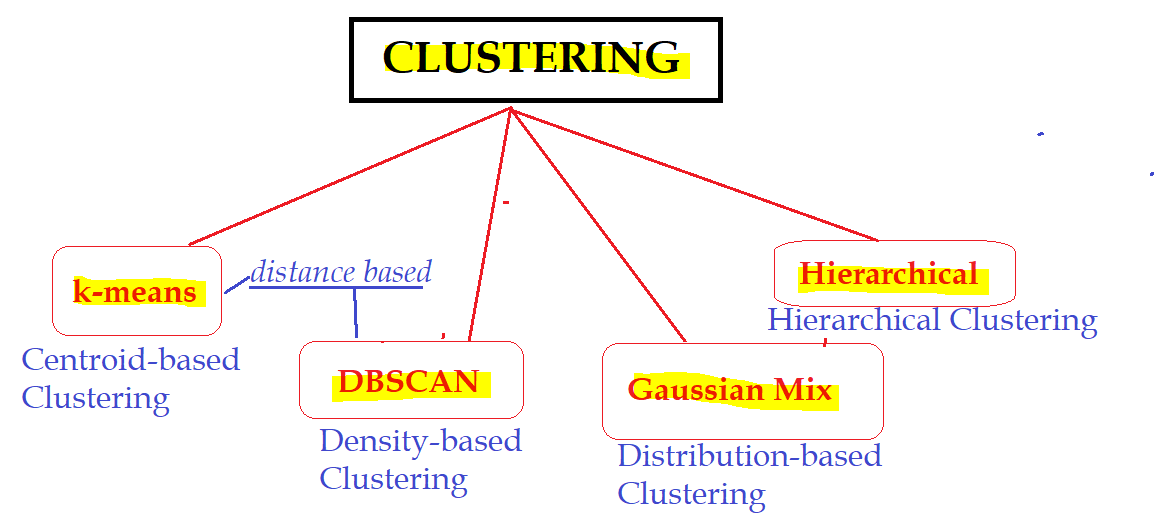

K-MEAN
-----

- It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
- It is a centroid-based algorithm, where each cluster is associated with a centroid.
- The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.


steps

- Data Pre-processing
- Finding the optimal number of clusters using the elbow method
- Training the K-means algorithm on the training dataset
- Visualizing the clusters

Method to find optimal k (no of clusters)

- Elbow method
- Variance explained
- BIC score
- Silhouette Score

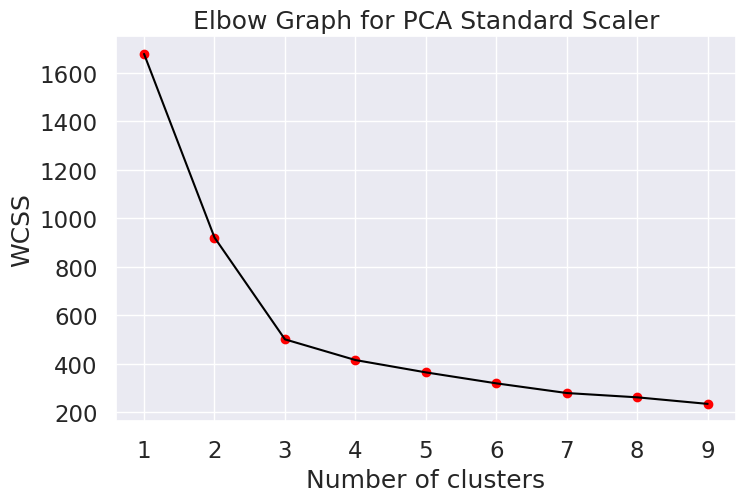

In [249]:
#ELBOW METHOD
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_std_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for PCA Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

colcusion - 3 clusters seems to be fair.

Varinace explained Method

In [250]:
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import euclidean_distances, silhouette_score

Text(0.5, 1.0, 'Elbow for KMeans clustering')

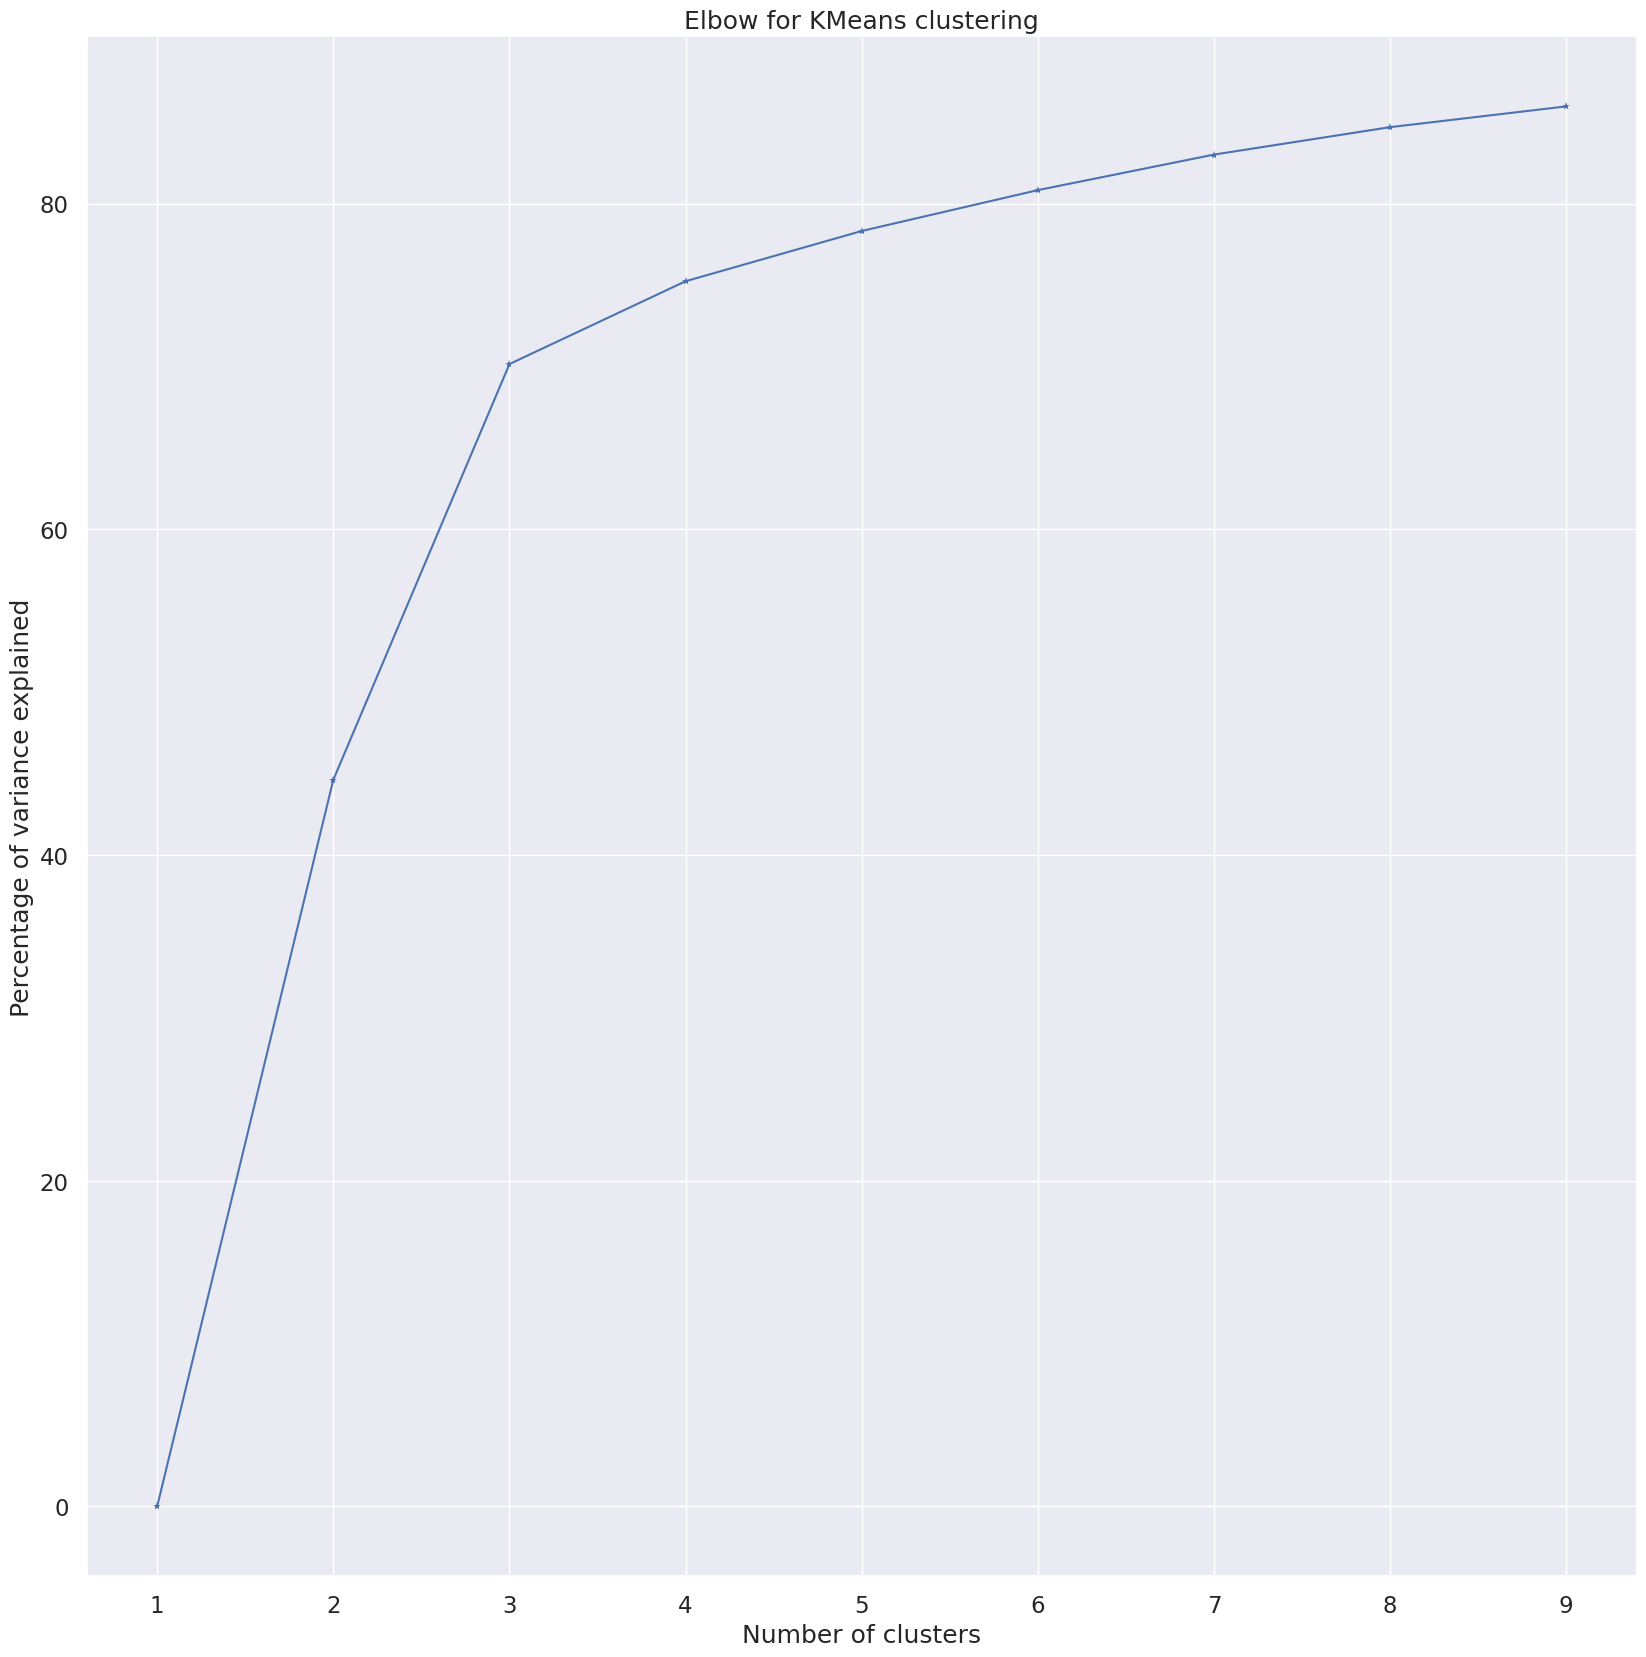

In [251]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(pca_std_df) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(pca_std_df, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(pca_std_df)**2)/pca_std_df.shape[0]
bss = tss-wcss
kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

conclusion -no of cluster k= 3

Silouette Score


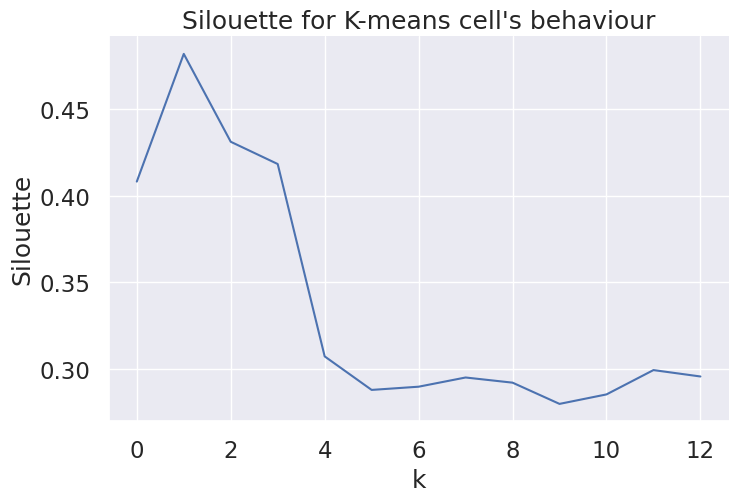

In [252]:
s = []
for n_clusters in range(2,15):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(pca_std_df)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  s.append(silhouette_score(pca_std_df, labels, metric='euclidean'))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

Silhouette score method indicates the best options would be respectively 3 clusters.

CONLUSION

- applied all method to find optimal k
- BIC mehtod not use beacuse - data is multi-dimension
- ELBOW METHOND - k= 3
- VARIANCE EXPLAINED - k=3
- Silouette score is max for k=3


HENCE K=OPTIMAL NO OF CLUSTER = 3

OPTIMAL MEANS
- MAX DISTANCE IN-BETWEEN CLUSTERS
- MINIMUM DISTANCE WITH-IN CLUSTER

Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset

In [253]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

(178,)

In [254]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [255]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [256]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[-3.00022931, -1.16059366, -0.23271123],
       [-0.08562687,  1.72743604,  0.24903744],
       [ 2.55325354, -0.9460415 , -0.08278602]])

In [257]:
# within-cluster sum of squared
model_kmeans.inertia_

501.17482400537745

In [258]:
#Assign clusters to the data set
data['Kmeans_label'] = model_kmeans.labels_

In [259]:
# Group data by Clusters/Labels
data.groupby('Kmeans_label').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
Kmeans_label                                                                   
0             2.960000  13.144000  3.346200  2.425600  21.330000  98.640000    
1             2.000000  12.246418  1.891642  2.242985  20.140299  93.238806    
2             1.032787  13.711475  1.997049  2.453770  17.281967  107.786885   

               Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                  mean       mean          mean            mean      mean   
Kmeans_label                                                                
0             1.677200  0.807000   0.45040       1.156400        7.264400   
1             2.258209  2.085672   0.36194       1.612836        3.059701   
2             2.842131  2.969180   0.28918       1.922951        5.444590   

                   Hue  Dilution      Proline          ID  
                  mean      mean         mean        mean  
Kmeans_label                                               
0             0.686200  1.698800  622.440000   152.380000  
1             1.059493  2.798507  508.597015   95.104478   
2             1.067705  3.154754  1110.639344  31.803279

KMEAN on PCA MinMaxScaler Applied Data

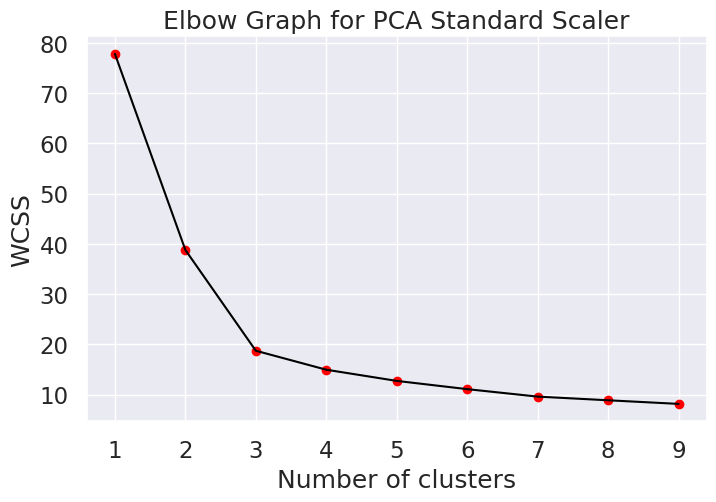

In [260]:
#ELBOW METHOD
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_minmax_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for PCA Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

CONLUSION NO OF CLUSTER = 3


Text(0.5, 1.0, 'Elbow for KMeans clustering')

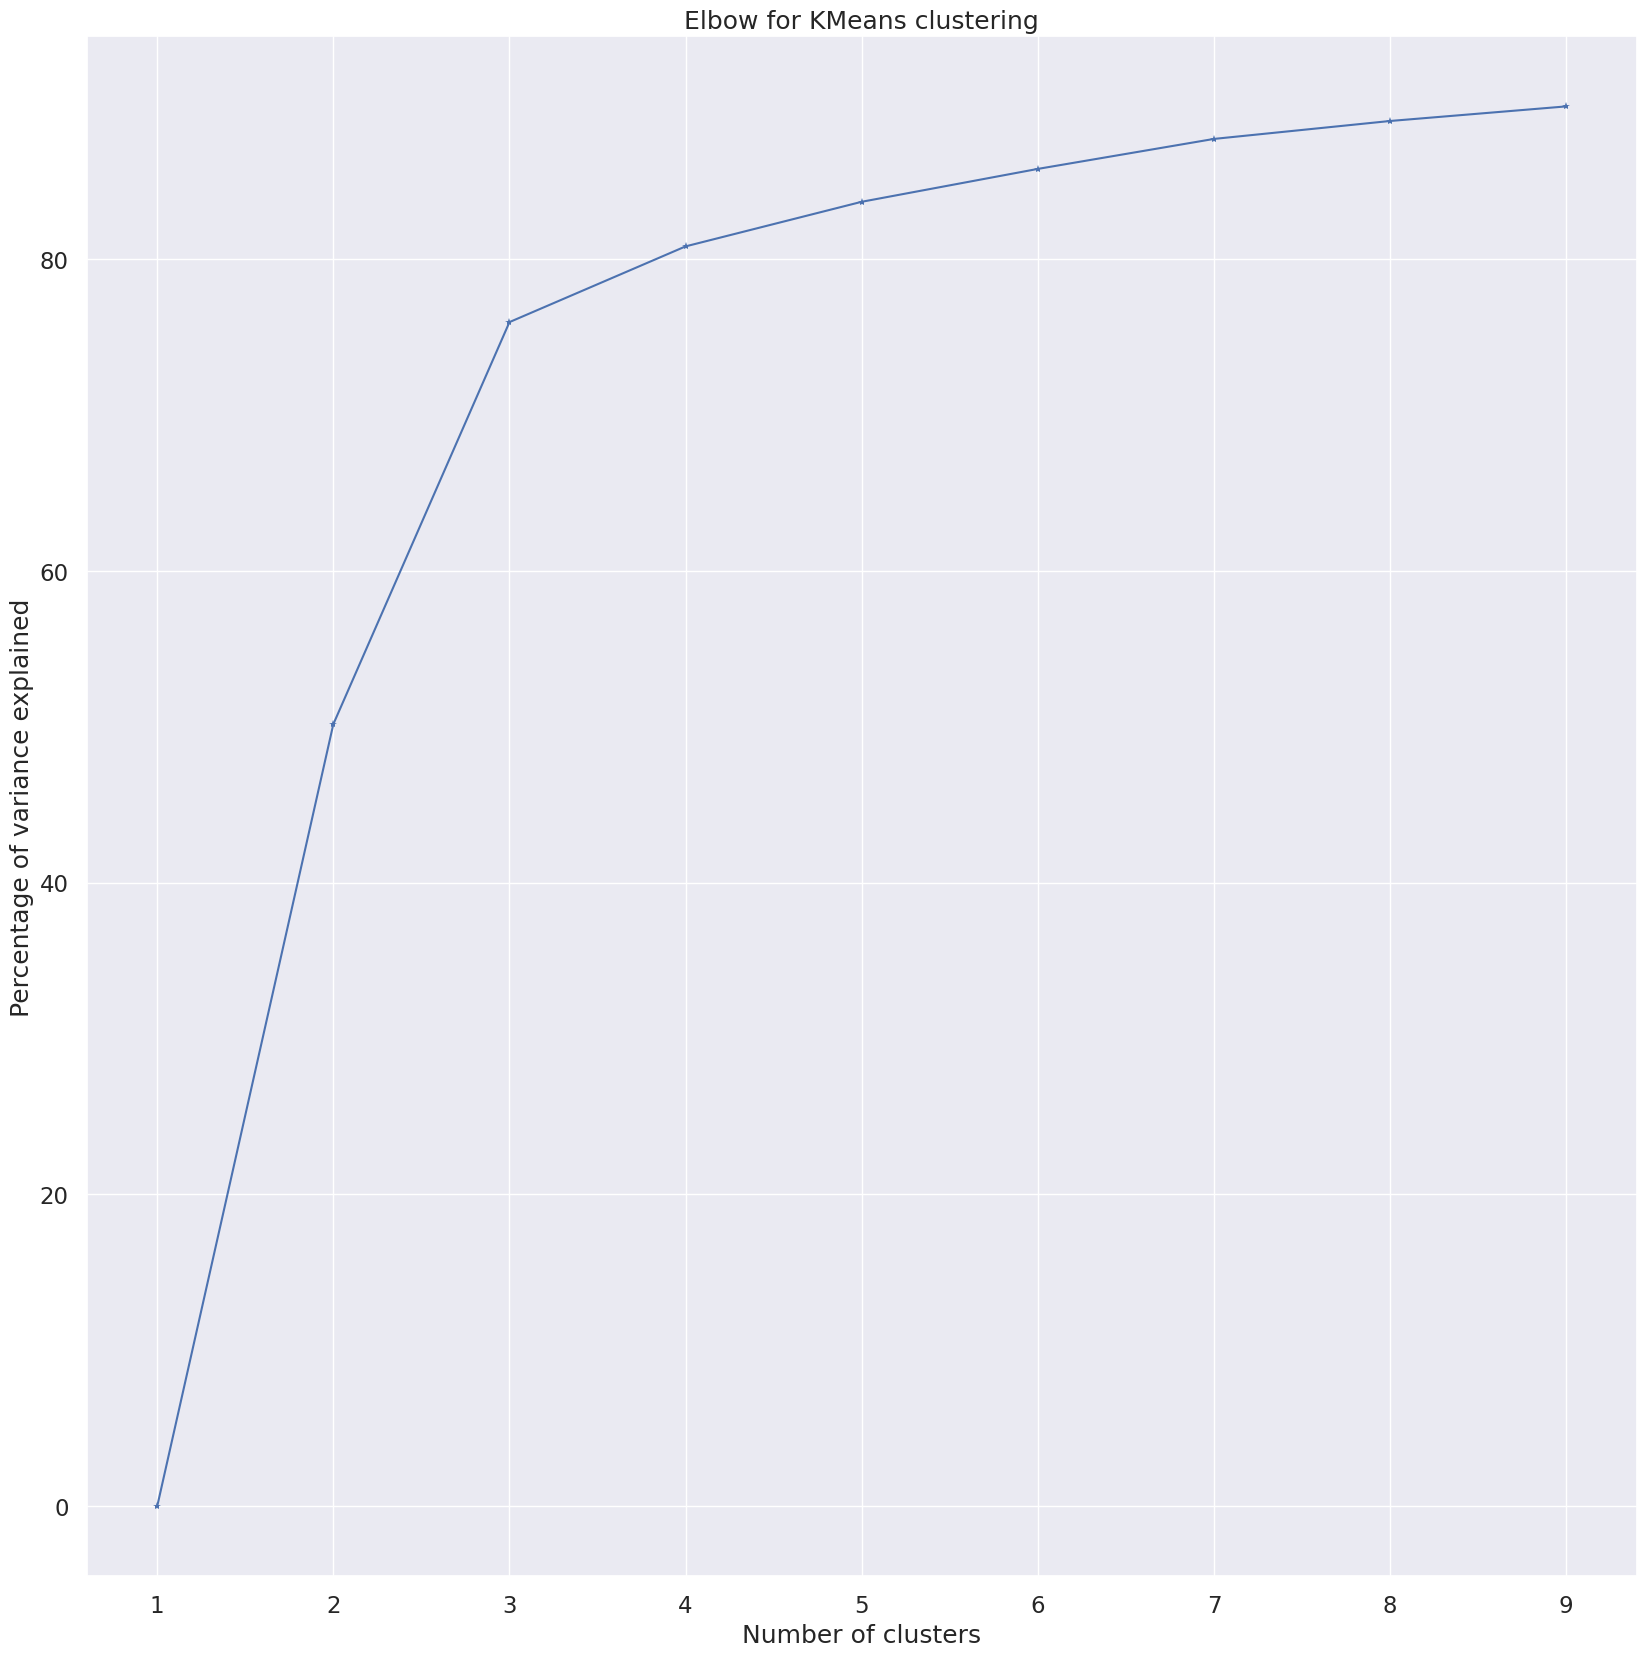

In [261]:
#VARIANCE EXPLAINED
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(pca_minmax_df) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(pca_minmax_df, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(pca_minmax_df)**2)/pca_minmax_df.shape[0]
bss = tss-wcss
kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

conclusion : no of cluster = 3

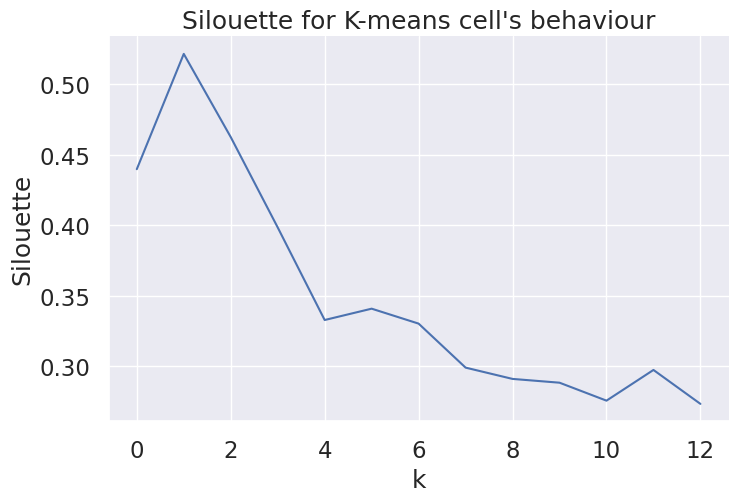

In [262]:
#silhouette_score
s = []
for n_clusters in range(2,15):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(pca_minmax_df)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  s.append(silhouette_score(pca_minmax_df, labels, metric='euclidean'))
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

CONLUSION

- applied all method to find optimal k
- BIC mehtod not use beacuse - data is multi-dimension
- ELBOW METHOND - k= 3
- VARIANCE EXPLAINED - k=3
- Silouette score is max for k=3


HENCE K=OPTIMAL NO OF CLUSTER = 3

OPTIMAL MEANS
- MAX DISTANCE IN-BETWEEN CLUSTERS
- MINIMUM DISTANCE WITH-IN CLUSTER

Building KMeans Cluster algorithm using K=3 and PCA on MINMAX Scale

In [263]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_df)
y_predict_kmeans.shape

(178,)

In [264]:
#cluster labels...
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [265]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [266]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[-0.69579292, -0.23298991,  0.00190367],
       [-0.02383121,  0.35770859,  0.01239953],
       [ 0.58649203, -0.19289148, -0.01473472]])

In [267]:
# within-cluster sum of squared
model_kmeans.inertia_

18.717061925694445

In [268]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [269]:
# Group data by Clusters
df.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000  98.640000   1.677200   
1             12.233333  1.905000  2.251212  20.218182  93.469697   2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0             0.807000   0.450400      1.156400        7.264400  0.686200   
1             2.069091   0.363485      1.602727        3.025758  1.058576   
2             2.972581   0.288710      1.928710        5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800  622.440000   152.380000  
1             2.792727  508.696970   95.530303   
2             3.155161  1100.822581  32.370968

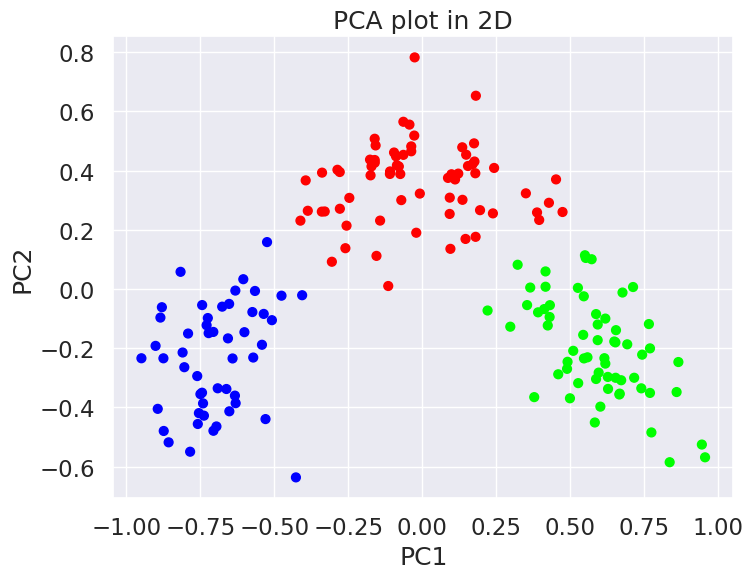

In [270]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

conclusion : 3 number of clusters formed

In [271]:
# Sorting elements based on cluster label assigned and taking average for insights.df1 = data.copy()
df1 = data.copy()
df1['Cluster'] = model_kmeans.labels_

cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [272]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type             2.9600        2.000000      1.048387    
Alcohol          13.1440       12.233333     13.701774   
Malic            3.3462        1.905000      1.981129    
Ash              2.4256        2.251212      2.441613    
Alcalinity       21.3300       20.218182     17.245161   
Magnesium        98.6400       93.469697     107.306452  
Phenols          1.6772        2.247273      2.844355    
Flavanoids       0.8070        2.069091      2.972581    
Nonflavanoids    0.4504        0.363485      0.288710    
Proanthocyanins  1.1564        1.602727      1.928710    
Color            7.2644        3.025758      5.442258    
Hue              0.6862        1.058576      1.068548    
Dilution         1.6988        2.792727      3.155161    
Proline          622.4400      508.696970    1100.822581 
ID               152.3800      95.530303     32.370968   
Kmeans_label     0.0000        1.000000      1.983871    
Cluster          0.0000        1.000000      2.000000

Comparing Kmeans Clusters with the Original Labeled Dataset

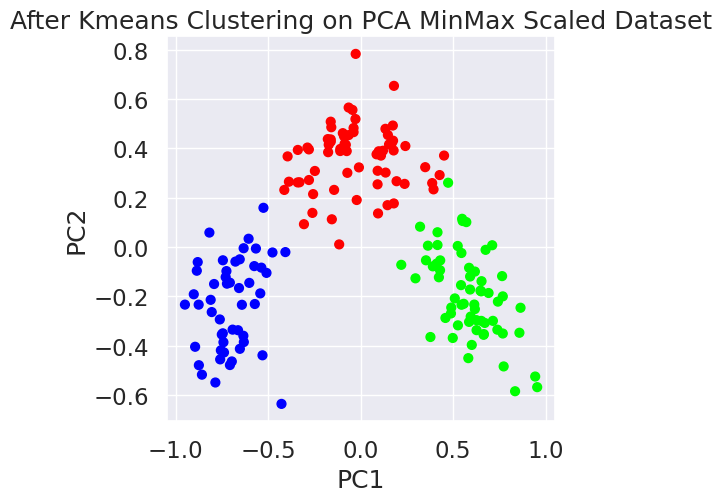

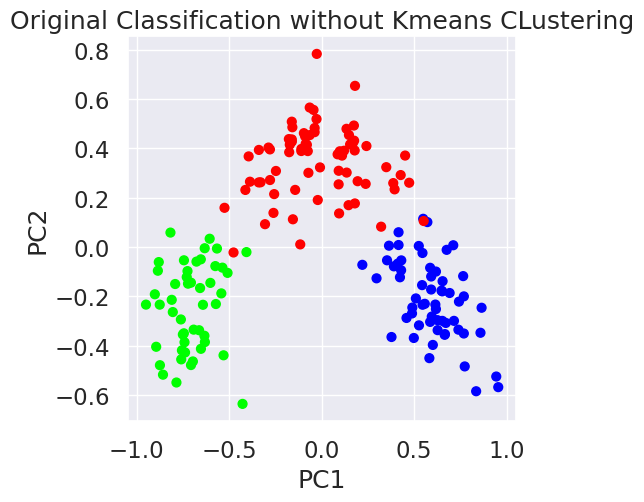

In [273]:
# Scatterplot
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Kmeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [274]:
# Group data by Clusters (K=3)
display('After Applying PCA and Kmens CLustering on Dataset',df.groupby('Kmeans_label').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying PCA and Kmens CLustering on Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000  98.640000   1.677200   
1             12.233333  1.905000  2.251212  20.218182  93.469697   2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0             0.807000   0.450400      1.156400        7.264400  0.686200   
1             2.069091   0.363485      1.602727        3.025758  1.058576   
2             2.972581   0.288710      1.928710        5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800  622.440000   152.380000  
1             2.792727  508.696970   95.530303   
2             3.155161  1100.822581  32.370968

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864  30.0   2.0          
2     519.507042   95.0   1.0          
3     629.895833   154.5  0.0

CONCLUSION -

- Type 2 has been perfectly clustered
- rest has negliglable amount of difference
- We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

Hierarchical Clustering Algorithm
------

- Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.
- In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram

approaches:
- Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
- Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.


Measure for the distance between two clusters - **Linkage methods**

- single
- complete
- centriod
- average

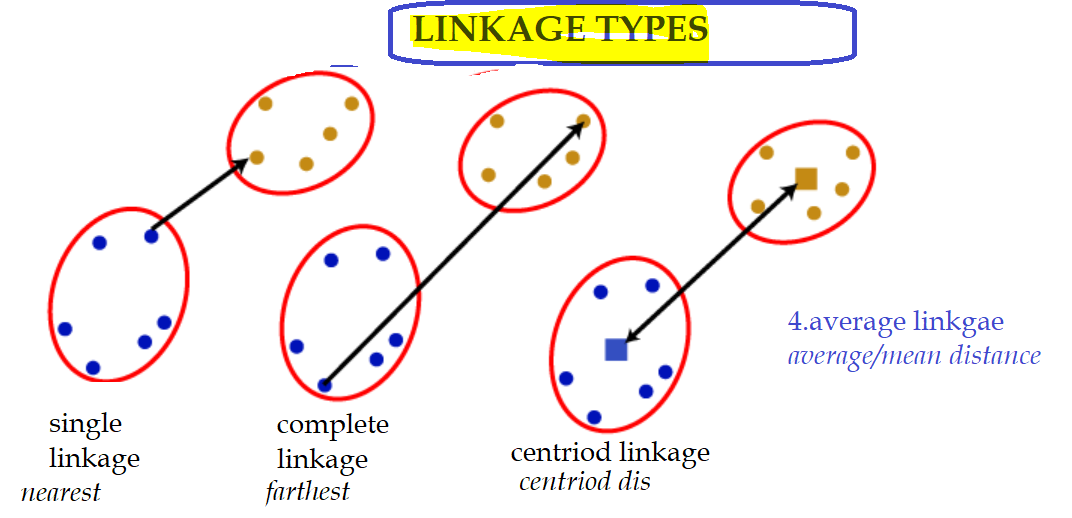

APPLYING ON MINMAX DATA

In [275]:
n_clusters = [2,3,4,5,6]

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
            silhouette_score1 = sil(pca_minmax_df, hie_labels1)
            print("For nof of clusters =", n_clusters,"avg silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For nof of clusters = 2 avg silhouette_score with linkage- complete and Affinity- euclidean : 0.4448273929121037
For nof of clusters = 2 avg silhouette_score with linkage- complete and Affinity- l1 : 0.21595497316869947
For nof of clusters = 2 avg silhouette_score with linkage- complete and Affinity- l2 : 0.4448273929121037
For nof of clusters = 2 avg silhouette_score with linkage- complete and Affinity- manhattan : 0.21595497316869947
For nof of clusters = 2 avg silhouette_score with linkage- complete and Affinity- cosine : 0.4448273929121037

For nof of clusters = 2 avg silhouette_score with linkage- average and Affinity- euclidean : 0.45988022636848064
For nof of clusters = 2 avg silhouette_score with linkage- average and Affinity- l1 : 0.45450203341693884
For nof of clusters = 2 avg silhouette_score with linkage- average and Affinity- l2 : 0.45988022636848064
For nof of clusters = 2 avg silhouette_score with linkage- average and Affinity- manhattan : 0.45450203341693884
For nof of 

CONCLUSION - best score for

- method - average
- cluster = 3
- affinity = l2

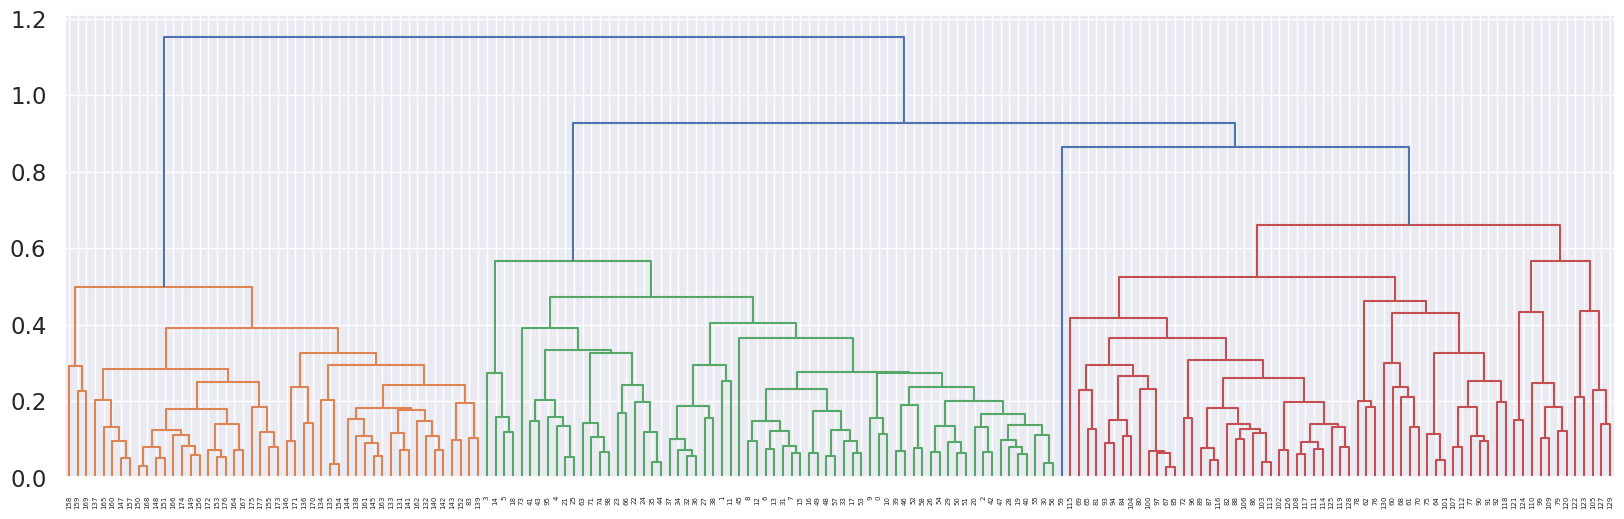

In [276]:
#visulaizing dendogram
plt.figure(figsize =(20, 6))
sch.dendrogram(sch.linkage(pca_minmax_df, method ='average',optimal_ordering=False))
plt.show()

conclusion :

- For no of clusters = 3 The average silhouette_score with linkage- avearge : and Affinity - l2: 0.512478461893362

BUILDING MODEL ON PCA MINMAX SCALED DATA

In [277]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [278]:
# Clustering Score

(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

51.639

In [279]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  14.23    1.71   2.43  15.6        127        2.80     3.06         
1  13.20    1.78   2.14  11.2        100        2.65     2.76         
2  13.16    2.36   2.67  18.6        101        2.80     3.24         
3  14.37    1.95   2.50  16.8        113        3.85     3.49         
4  13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0  0.28           2.29             5.64   1.04  3.92      1065     1    
1  0.26           1.28             4.38   1.05  3.40      1050     2    
2  0.30           2.81             5.68   1.03  3.17      1185     3    
3  0.24           2.18             7.80   0.86  3.45      1480     4    
4  0.39           1.82             4.32   1.04  2.93      735      5    

   Kmeans_label  Hierarchical_labels  
0  2             2                    
1  2             2                    
2  2             2                    
3  2             2                    
4  2             2

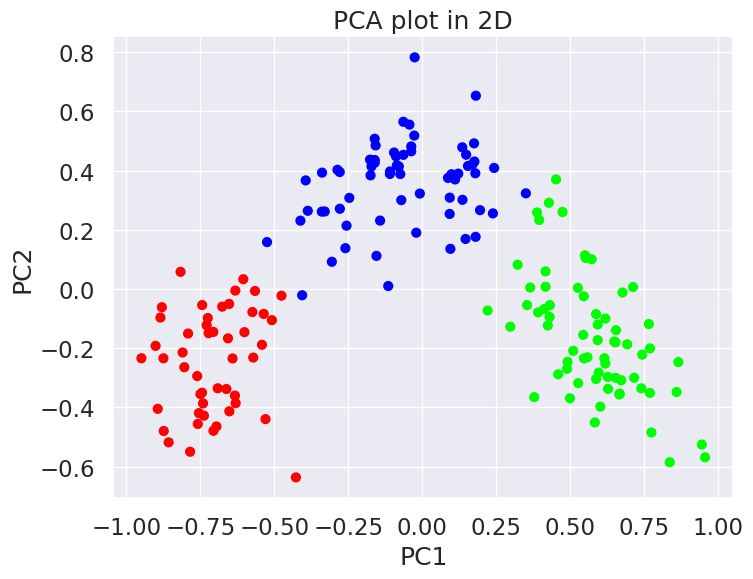

In [280]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

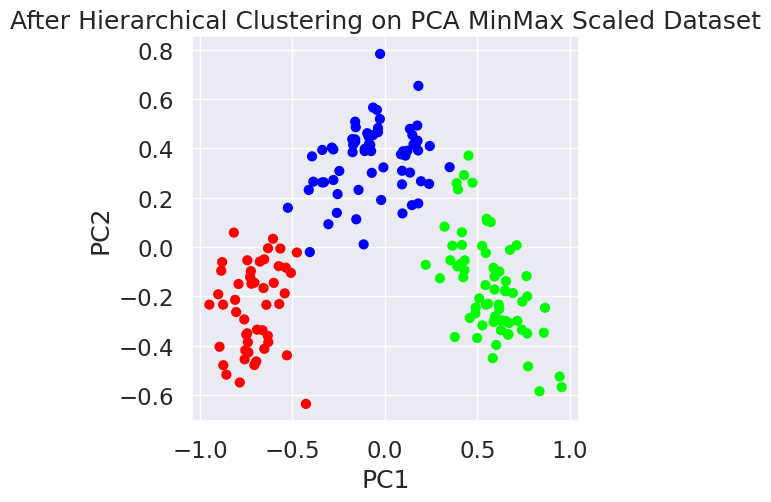

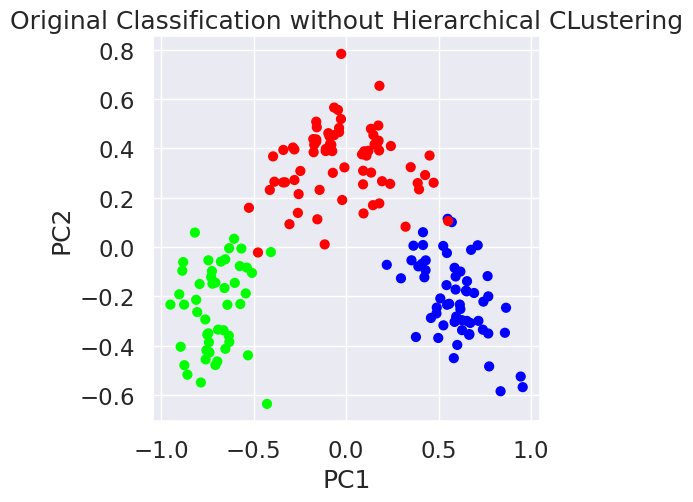

In [281]:
# Scatterplot
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

PCA Standard Scaled Data and hierarcy clustering

In [282]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4187797009092469
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- average : 0.34854041549326364
For n_clusters = 2 The average silhouette_score with linkage- single : 0.34854041549326364

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4355352661667812
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.29482654329265323
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4025547835526694
For n_clusters = 3 The average silhouette_score with linkage- single : 0.2578938247338433

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.37397039586911796
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4171188330984906
For n_clusters = 4 The average silhouette_score with linkage- average : 0.46890675907642115

CONCLUSION - best score for

- method - complete
- cluster = 4
- affinity = l1


 Hierarchical Clustering For PCA on Standard Scaled Data

In [283]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [284]:
# Cluster numbers
agg_clustering.n_clusters_

4

In [285]:
# Clustering Score
(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

47.312

Putting Cluster lables into original dataset And analysis of the same

In [286]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  14.23    1.71   2.43  15.6        127        2.80     3.06         
1  13.20    1.78   2.14  11.2        100        2.65     2.76         
2  13.16    2.36   2.67  18.6        101        2.80     3.24         
3  14.37    1.95   2.50  16.8        113        3.85     3.49         
4  13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0  0.28           2.29             5.64   1.04  3.92      1065     1    
1  0.26           1.28             4.38   1.05  3.40      1050     2    
2  0.30           2.81             5.68   1.03  3.17      1185     3    
3  0.24           2.18             7.80   0.86  3.45      1480     4    
4  0.39           1.82             4.32   1.04  2.93      735      5    

   Kmeans_label  Hierarchical_labels  
0  2             1                    
1  2             1                    
2  2             1                    
3  2             1                    
4  2             1

In [287]:
df.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548  92.000000    
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417  98.541667    
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419  1.959194   0.370645      1.529516         
1                    2.821385  2.942154   0.283077      1.946923         
2                    1.681667  0.788542   0.455833      1.167708         
3                    3.036667  3.550000   0.383333      1.916667         

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.937097  1.042516  2.740000  497.564516   97.403226    
1                    5.378308  1.070308  3.124308  1072.276923  35.400000    
2                    7.410833  0.684375  1.698542  627.500000   153.520833   
3                    4.310000  1.123333  3.463333  760.000000   74.000000    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    0.967742     
1                    1.923077     
2                    0.000000     
3                    1.666667

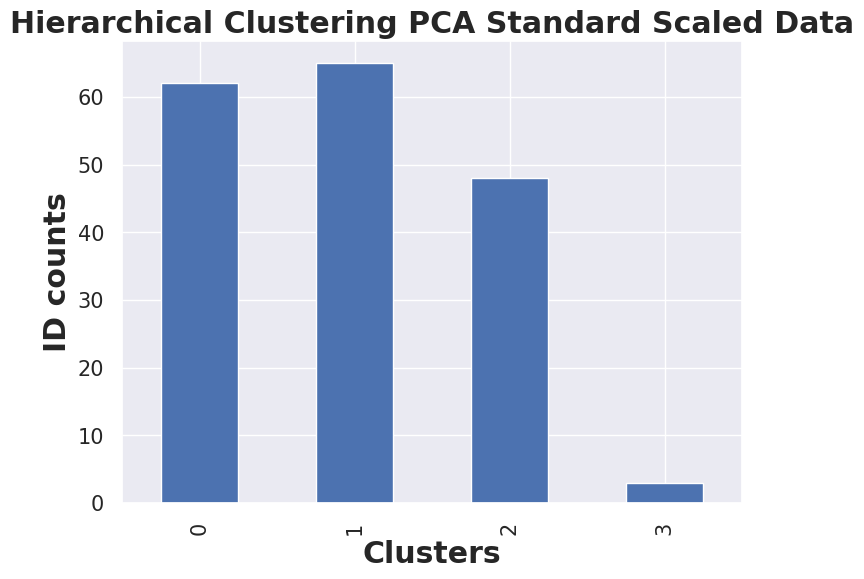

In [288]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(8, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

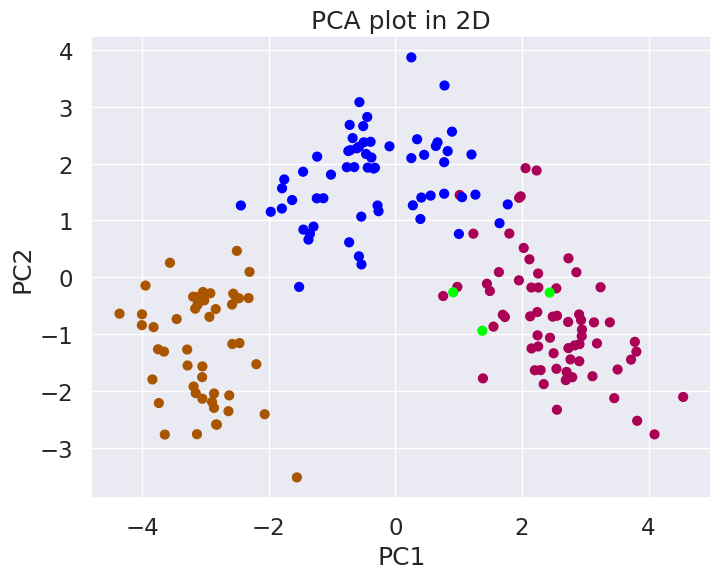

In [289]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Conclusion:  We cannot now clearly see the 4 number of clusters formed

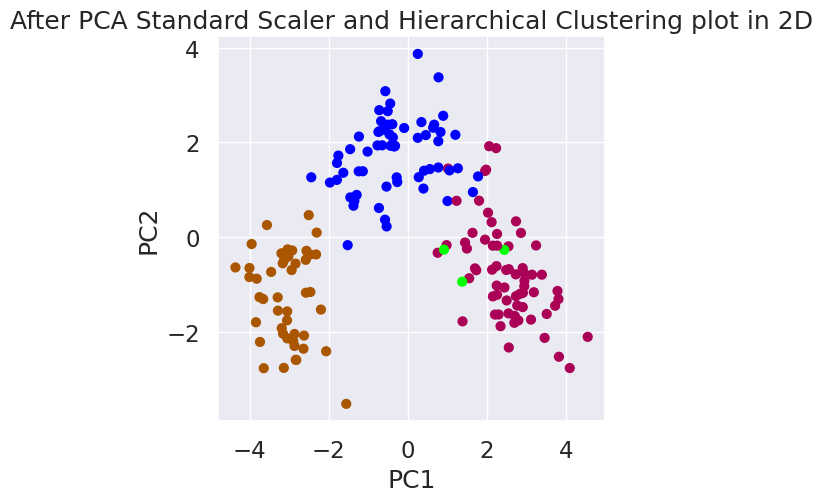

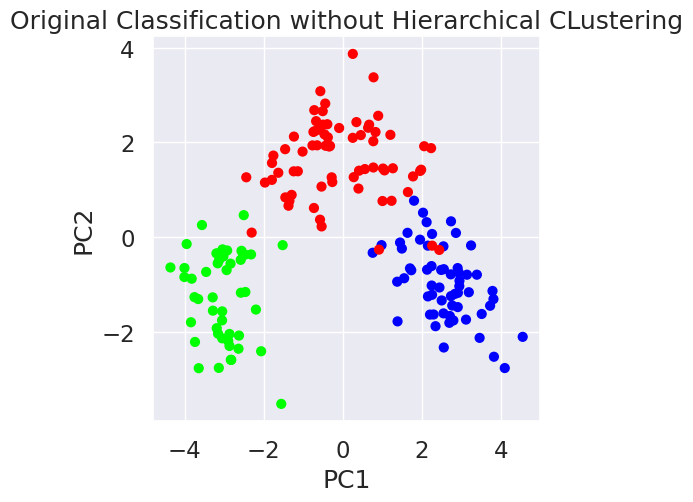

In [290]:
# Scatterplot
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

colcusion : As you can see the most of the data is in the first three clusters and very little amount of data in the last cluster (cluster no 4 )  so it must been that clusters are overlapping or may be that the data belonging to clusters may be wrong/incorrect.

# We can now clearly see the 3 number of clusters formed

# FINAL CONCLUSION

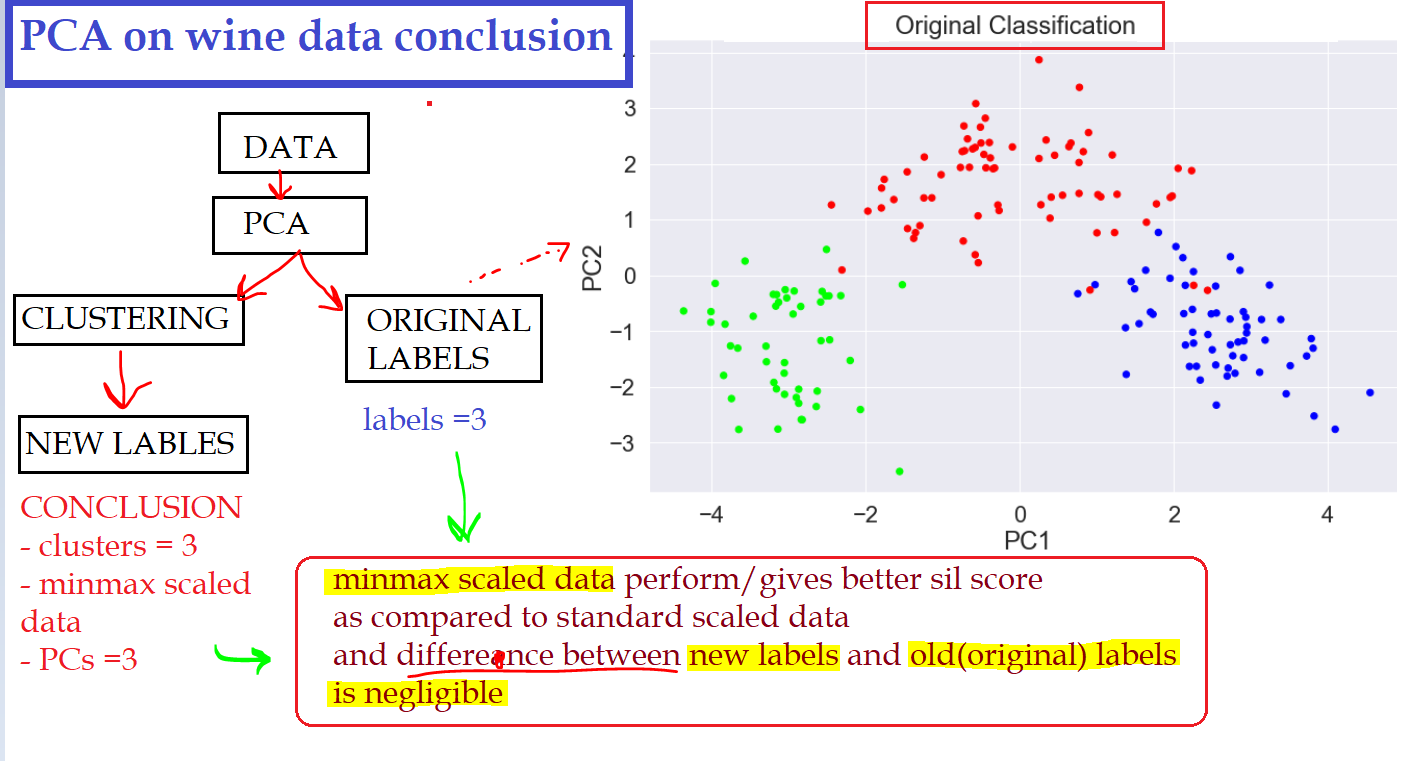

# Conclusion :
- The 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature